In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nfl-big-data-bowl-2025/players.csv
/kaggle/input/nfl-big-data-bowl-2025/tracking_week_7.csv
/kaggle/input/nfl-big-data-bowl-2025/tracking_week_9.csv
/kaggle/input/nfl-big-data-bowl-2025/tracking_week_6.csv
/kaggle/input/nfl-big-data-bowl-2025/games.csv
/kaggle/input/nfl-big-data-bowl-2025/tracking_week_8.csv
/kaggle/input/nfl-big-data-bowl-2025/player_play.csv
/kaggle/input/nfl-big-data-bowl-2025/tracking_week_4.csv
/kaggle/input/nfl-big-data-bowl-2025/tracking_week_3.csv
/kaggle/input/nfl-big-data-bowl-2025/tracking_week_5.csv
/kaggle/input/nfl-big-data-bowl-2025/tracking_week_1.csv
/kaggle/input/nfl-big-data-bowl-2025/plays.csv
/kaggle/input/nfl-big-data-bowl-2025/tracking_week_2.csv


In [53]:
print(tf.__version__)

2.17.0


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image, display
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler

In [3]:
plays_df = pd.read_csv('/kaggle/input/nfl-big-data-bowl-2025/plays.csv')

plays_df3 = plays_df[plays_df['down'] == 3]

feature = ['gameId', 'playId', 'yardsToGo', 'yardsGained']
plays_df3 = plays_df3[feature]

plays_df3['result'] = plays_df3.apply(
    lambda row: 1 if (row['yardsGained'] - row['yardsToGo'])>= 0 else 0, axis=1
)

plays_df3.drop(columns='yardsGained', inplace=True)

plays_df3['Id'] = plays_df3['gameId'].astype(str) + plays_df3['playId'].astype(str)
plays_df3['Id'] = plays_df3['Id'].astype(int)

week1 = pd.read_csv('/kaggle/input/nfl-big-data-bowl-2025/tracking_week_1.csv')
week2 = pd.read_csv('/kaggle/input/nfl-big-data-bowl-2025/tracking_week_2.csv')
week3 = pd.read_csv('/kaggle/input/nfl-big-data-bowl-2025/tracking_week_3.csv')
week4 = pd.read_csv('/kaggle/input/nfl-big-data-bowl-2025/tracking_week_4.csv')
week5 = pd.read_csv('/kaggle/input/nfl-big-data-bowl-2025/tracking_week_5.csv')
week6 = pd.read_csv('/kaggle/input/nfl-big-data-bowl-2025/tracking_week_6.csv')
week7 = pd.read_csv('/kaggle/input/nfl-big-data-bowl-2025/tracking_week_7.csv')
week8 = pd.read_csv('/kaggle/input/nfl-big-data-bowl-2025/tracking_week_8.csv')
week9 = pd.read_csv('/kaggle/input/nfl-big-data-bowl-2025/tracking_week_9.csv')

week1 = pd.concat([week1, week2, week3, week4, week5, week6, week7, week8, week9], ignore_index=True)
plays_df3_1 = plays_df3.merge(week1, on=['gameId', 'playId'])

plays_df3_1.columns

Index(['gameId', 'playId', 'yardsToGo', 'result', 'Id', 'nflId', 'displayName',
       'frameId', 'frameType', 'time', 'jerseyNumber', 'club', 'playDirection',
       'x', 'y', 's', 'a', 'dis', 'o', 'dir', 'event'],
      dtype='object')

In [4]:
plays_df3_1 = plays_df3_1[plays_df3_1['frameType'] == 'BEFORE_SNAP']

plays_df3_1['playDirection'] = (plays_df3_1['playDirection']=='right').astype(int)

plays_df3_1 = plays_df3_1.sort_values(by=['Id', 'frameId'], ascending=True)

In [5]:
Id = list(plays_df3_1.Id.unique())
count = 1
v = pd.DataFrame()
for x in Id:
    count+=1
    max_frameId = plays_df3_1[plays_df3_1['Id']==x].frameId.max()
    z = plays_df3_1[(plays_df3_1['Id']==x)&(plays_df3_1['frameId']==max_frameId)]
    v = pd.concat([v, z], ignore_index=True)

In [38]:
len(v)

75394

In [11]:
print(75394/23)
len(v.Id.unique())

3278.0


3278

In [8]:
u = v

In [9]:
u.groupby(by='result').Id.nunique()

result
0    1952
1    1326
Name: Id, dtype: int64

In [19]:
print(1952*23)
print(1326*23)

44896
30498


In [10]:
print(pause)
week1 = 0
week2 = 0
week3 = 0
week4 = 0
week5 = 0
week6 = 0
week7 = 0
week8 = 0
week9 = 0

NameError: name 'pause' is not defined

In [17]:
23*1000

23000

In [21]:
print(44896-23000)
print(30498-23000)

21896
7498


In [22]:
w_r0 = u[u.result==0].head(23000)
w_r1 = u[u.result==1].head(23000)
w_r = pd.concat([w_r0, w_r1], ignore_index=True)

In [23]:
w_r0_rest = u[u.result==0].tail(21896)
w_r1_rest = u[u.result==1].tail(7498)
w_r_rest = pd.concat([w_r0_rest, w_r1_rest], ignore_index=True)

In [24]:
w = w_r

In [25]:
w.x = w.x.astype(int)
print(len(w.x.unique()))
w.y = w.y.astype(int)
print(len(w.y.unique()))

112
47


In [ ]:
from sklearn.preprocessing import OneHotEncoder
range_values = list(range(0,120))
encoder = OneHotEncoder(categories=[range_values], sparse_output=False)
#Encode 'x' and 'y' columns
x_io = encoder.fit_transform(w.x.values.reshape(-1, 1))
y_io = encoder.fit_transform(w.y.values.reshape(-1, 1))

# Convert to DataFrame for better readability
x_io = pd.DataFrame(x_io, columns=[f'x_{i}' for i in range_values])
y_io = pd.DataFrame(y_io, columns=[f'y_{i}' for i in range_values])


In [27]:
w1 = w[['playDirection', 'yardsToGo']]
w1 = pd.concat([w1, x_io, y_io], axis=1)
data = w1.to_numpy()
print(data.shape)

(46000, 242)


1000/23

In [28]:
chan_Id = data.shape[0]/(23)
chan_Id = int(chan_Id)
xy_feature = int(data.shape[1])
print(chan_Id, xy_feature)

2000 242


In [29]:
reshaped_data = data.reshape(chan_Id, 23, xy_feature)
print(reshaped_data.shape)

(2000, 23, 242)


In [30]:
Id = list(w.Id.unique())
result = pd.DataFrame()
for i in Id:
    r = w[w['Id']==i].head(1)
    result = pd.concat([result, r], ignore_index=True)

result = result['result']
result = result.to_numpy()

In [31]:
from sklearn.model_selection import train_test_split

data_train, data_test, labels_train, labels_test = train_test_split(reshaped_data, result, test_size=0.2, random_state=42)

# Model

Model 1: conv2DFilter=16, kernelSize=(3, 3), poolSize=(2, 2), dropoutNum=0.25, kernelReg=0.01, batchSize=3, lr=0.0001
Epoch 1/45
427/427 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.5210 - loss: 3.5207 - val_accuracy: 0.5188 - val_loss: 2.5147
Epoch 2/45
427/427 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.5391 - loss: 2.2806 - val_accuracy: 0.5406 - val_loss: 1.7526
Epoch 3/45
427/427 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.5622 - loss: 1.6217 - val_accuracy: 0.5625 - val_loss: 1.3433
Epoch 4/45
427/427 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.5990 - loss: 1.2687 - val_accuracy: 0.6000 - val_loss: 1.1134
Epoch 5/45
427/427 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.6214 - loss: 1.0543 - val_accuracy: 0.6156 - val_loss: 0.9777
Epoch 6/45
427/427 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.6530 - loss: 0.9380 - val_accuracy: 0.6281 - val_loss: 0.8972
Epoch 7/45
427/427 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.6220 - loss: 0.8752 - val_accuracy: 0.63

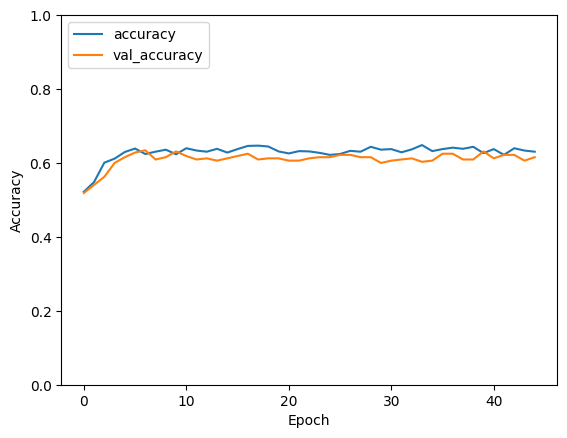

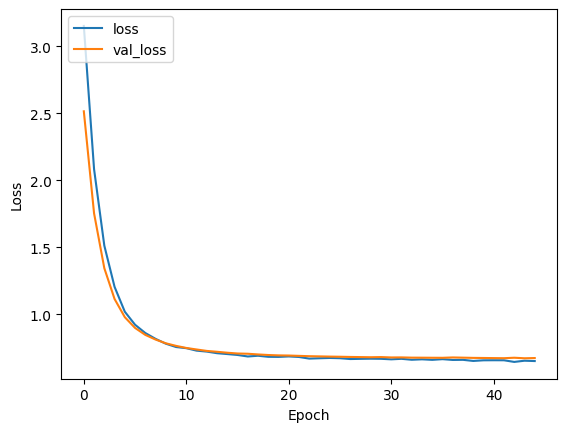

Model model_1 saved successfully.
History for model_1 saved successfully.
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5872 - loss: 0.6798
Test Loss: 0.6739, Test Accuracy: 0.5950
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
              precision    recall  f1-score   support

           0       0.60      0.54      0.57       199
           1       0.59      0.65      0.62       201

    accuracy                           0.59       400
   macro avg       0.60      0.59      0.59       400
weighted avg       0.60      0.59      0.59       400

Model 2: conv2DFilter=16, kernelSize=(3, 3), poolSize=(2, 2), dropoutNum=0.25, kernelReg=0.01, batchSize=5, lr=0.0001
Epoch 1/45


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.4815 - loss: 3.6688 - val_accuracy: 0.4563 - val_loss: 2.8837
Epoch 2/45
256/256 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.5053 - loss: 2.6786 - val_accuracy: 0.4812 - val_loss: 2.1626
Epoch 3/45
256/256 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.5276 - loss: 2.0243 - val_accuracy: 0.5625 - val_loss: 1.6852
Epoch 4/45
256/256 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.5737 - loss: 1.5819 - val_accuracy: 0.5594 - val_loss: 1.3713
Epoch 5/45
256/256 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.6144 - loss: 1.2938 - val_accuracy: 0.5656 - val_loss: 1.1640
Epoch 6/45
256/256 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.5938 - loss: 1.1190 - val_accuracy: 0.6031 - val_loss: 1.0246
Epoch 7/45
256/256 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.6255 - loss: 0.9911 - val_accuracy: 0.6031 - val_loss: 0.9318
Epoch 8/45
256/256 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.6168 - loss: 0.8998 - val_accuracy: 0.637

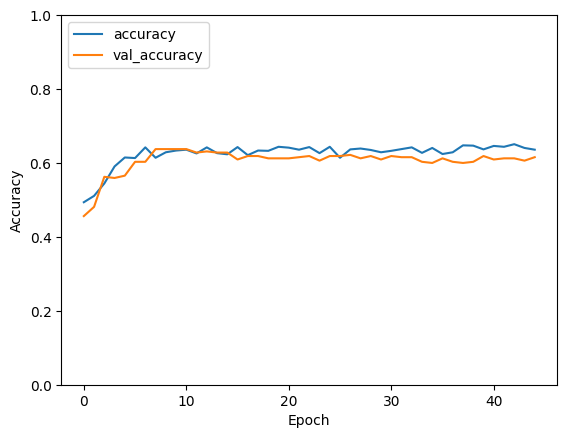

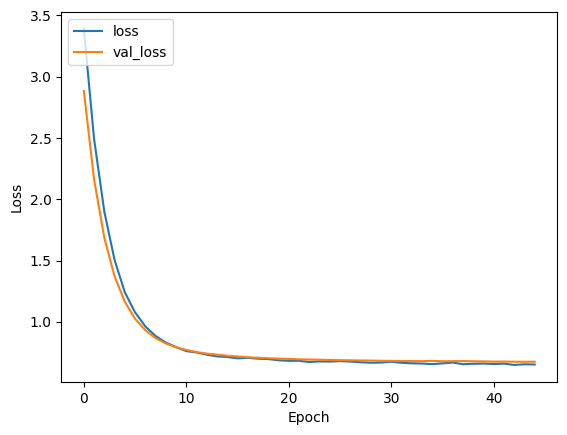

Model model_2 saved successfully.
History for model_2 saved successfully.
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5988 - loss: 0.6828
Test Loss: 0.6763, Test Accuracy: 0.6000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
              precision    recall  f1-score   support

           0       0.62      0.50      0.55       199
           1       0.59      0.70      0.64       201

    accuracy                           0.60       400
   macro avg       0.60      0.60      0.60       400
weighted avg       0.60      0.60      0.60       400

Model 3: conv2DFilter=16, kernelSize=(3, 3), poolSize=(2, 2), dropoutNum=0.25, kernelReg=0.01, batchSize=7, lr=0.0001
Epoch 1/45


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


183/183 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.5413 - loss: 3.7138 - val_accuracy: 0.4594 - val_loss: 3.0822
Epoch 2/45
183/183 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.5298 - loss: 2.9016 - val_accuracy: 0.4719 - val_loss: 2.4444
Epoch 3/45
183/183 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.5527 - loss: 2.3066 - val_accuracy: 0.5469 - val_loss: 1.9770
Epoch 4/45
183/183 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.5580 - loss: 1.8744 - val_accuracy: 0.5719 - val_loss: 1.6370
Epoch 5/45
183/183 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.5798 - loss: 1.5547 - val_accuracy: 0.5969 - val_loss: 1.3895
Epoch 6/45
183/183 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.6166 - loss: 1.3242 - val_accuracy: 0.6313 - val_loss: 1.2093
Epoch 7/45
183/183 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.6384 - loss: 1.1608 - val_accuracy: 0.6156 - val_loss: 1.0782
Epoch 8/45
183/183 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.6306 - loss: 1.0377 - val_accuracy: 0.628

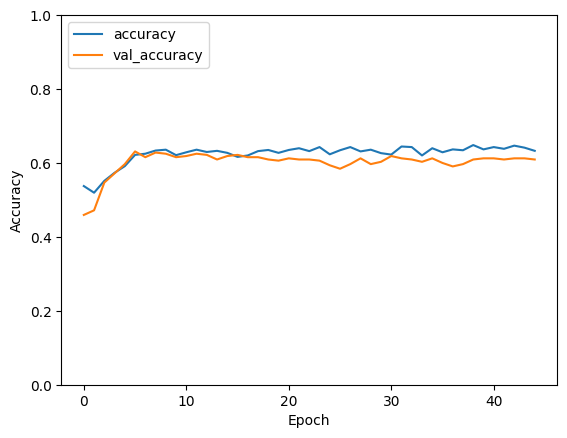

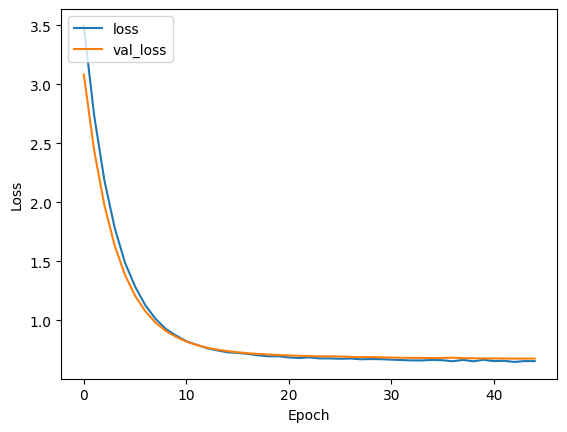

Model model_3 saved successfully.
History for model_3 saved successfully.
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5959 - loss: 0.6867
Test Loss: 0.6799, Test Accuracy: 0.6050
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
              precision    recall  f1-score   support

           0       0.63      0.49      0.55       199
           1       0.59      0.72      0.65       201

    accuracy                           0.60       400
   macro avg       0.61      0.60      0.60       400
weighted avg       0.61      0.60      0.60       400

Model 4: conv2DFilter=16, kernelSize=(3, 3), poolSize=(2, 2), dropoutNum=0.25, kernelReg=0.001, batchSize=3, lr=0.0001
Epoch 1/45


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


427/427 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.5166 - loss: 0.9939 - val_accuracy: 0.5500 - val_loss: 0.9541
Epoch 2/45
427/427 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.5665 - loss: 0.9345 - val_accuracy: 0.6156 - val_loss: 0.9124
Epoch 3/45
427/427 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.6112 - loss: 0.8916 - val_accuracy: 0.6156 - val_loss: 0.8903
Epoch 4/45
427/427 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.6320 - loss: 0.8735 - val_accuracy: 0.6313 - val_loss: 0.8751
Epoch 5/45
427/427 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.6105 - loss: 0.8635 - val_accuracy: 0.6062 - val_loss: 0.8655
Epoch 6/45
427/427 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.6621 - loss: 0.8368 - val_accuracy: 0.6094 - val_loss: 0.8495
Epoch 7/45
427/427 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.6462 - loss: 0.8228 - val_accuracy: 0.6125 - val_loss: 0.8447
Epoch 8/45
427/427 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.6585 - loss: 0.8119 - val_accuracy: 0.628

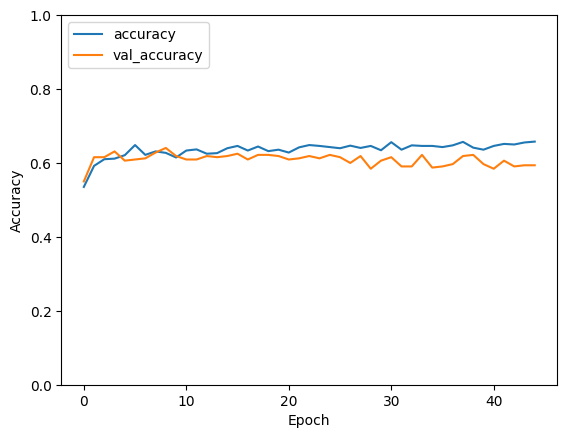

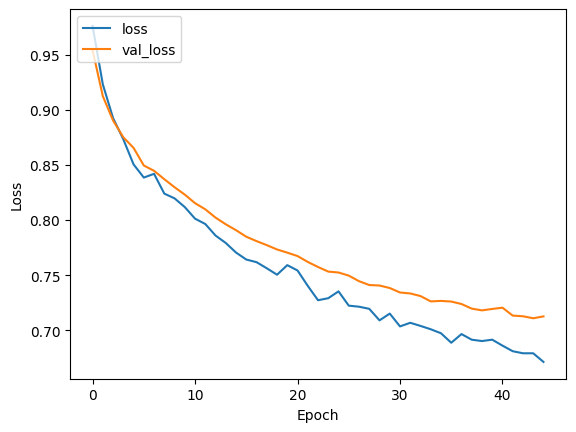

Model model_4 saved successfully.
History for model_4 saved successfully.
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5796 - loss: 0.7288
Test Loss: 0.7218, Test Accuracy: 0.5900
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
              precision    recall  f1-score   support

           0       0.65      0.37      0.47       199
           1       0.56      0.81      0.66       201

    accuracy                           0.59       400
   macro avg       0.61      0.59      0.57       400
weighted avg       0.61      0.59      0.57       400

Model 5: conv2DFilter=16, kernelSize=(3, 3), poolSize=(2, 2), dropoutNum=0.25, kernelReg=0.001, batchSize=5, lr=0.0001


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/45
256/256 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.5180 - loss: 1.0026 - val_accuracy: 0.5031 - val_loss: 0.9702
Epoch 2/45
256/256 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.5406 - loss: 0.9582 - val_accuracy: 0.5656 - val_loss: 0.9334
Epoch 3/45
256/256 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.5768 - loss: 0.9165 - val_accuracy: 0.6344 - val_loss: 0.9055
Epoch 4/45
256/256 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.6053 - loss: 0.8873 - val_accuracy: 0.6250 - val_loss: 0.8817
Epoch 5/45
256/256 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.6316 - loss: 0.8536 - val_accuracy: 0.6062 - val_loss: 0.8621
Epoch 6/45
256/256 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.6418 - loss: 0.8454 - val_accuracy: 0.6094 - val_loss: 0.8517
Epoch 7/45
256/256 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.6444 - loss: 0.8323 - val_accuracy: 0.6187 - val_loss: 0.8419
Epoch 8/45
256/256 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.6075 - loss: 0.8423 - val_accu

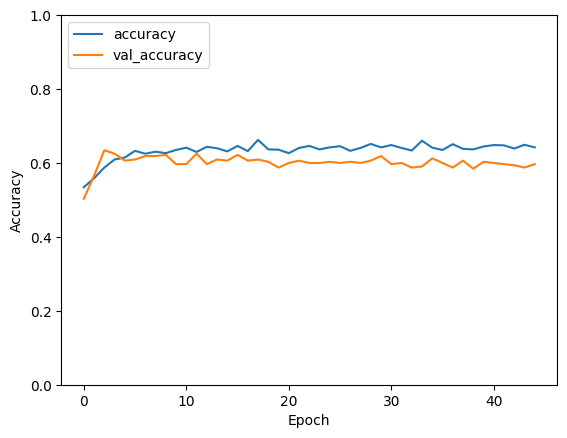

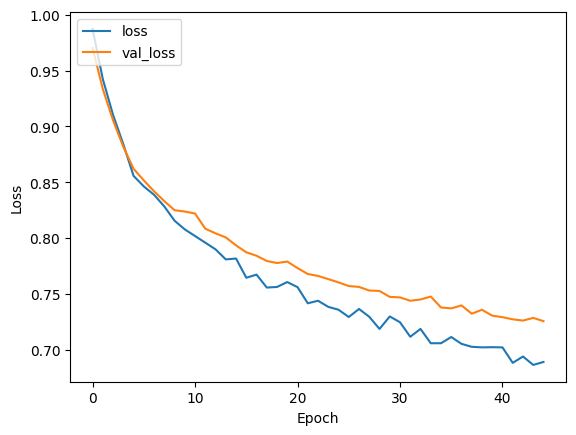

Model model_5 saved successfully.
History for model_5 saved successfully.
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5961 - loss: 0.7379
Test Loss: 0.7307, Test Accuracy: 0.5925
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
              precision    recall  f1-score   support

           0       0.65      0.39      0.49       199
           1       0.57      0.80      0.66       201

    accuracy                           0.59       400
   macro avg       0.61      0.59      0.57       400
weighted avg       0.61      0.59      0.57       400

Model 6: conv2DFilter=16, kernelSize=(3, 3), poolSize=(2, 2), dropoutNum=0.25, kernelReg=0.001, batchSize=7, lr=0.0001
Epoch 1/45


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


183/183 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.4798 - loss: 1.0113 - val_accuracy: 0.5219 - val_loss: 0.9796
Epoch 2/45
183/183 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.5747 - loss: 0.9672 - val_accuracy: 0.6094 - val_loss: 0.9466
Epoch 3/45
183/183 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.5944 - loss: 0.9319 - val_accuracy: 0.5781 - val_loss: 0.9184
Epoch 4/45
183/183 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.6118 - loss: 0.9016 - val_accuracy: 0.6250 - val_loss: 0.8918
Epoch 5/45
183/183 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.6332 - loss: 0.8695 - val_accuracy: 0.6313 - val_loss: 0.8752
Epoch 6/45
183/183 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.6300 - loss: 0.8541 - val_accuracy: 0.6187 - val_loss: 0.8622
Epoch 7/45
183/183 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.6237 - loss: 0.8485 - val_accuracy: 0.6156 - val_loss: 0.8518
Epoch 8/45
183/183 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.6154 - loss: 0.8448 - val_accuracy: 0.625

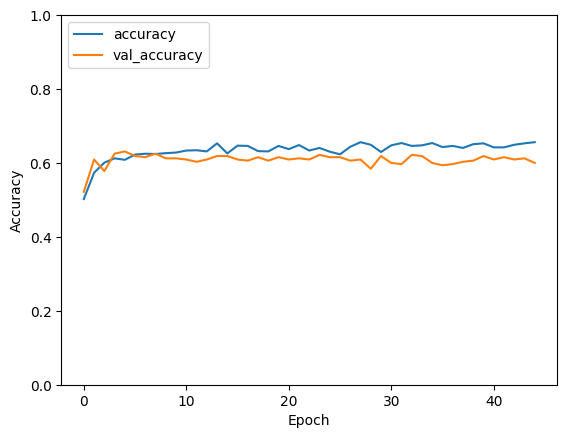

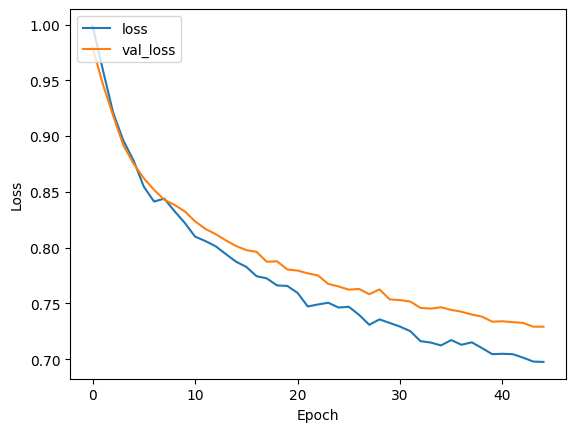

Model model_6 saved successfully.
History for model_6 saved successfully.
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6093 - loss: 0.7431
Test Loss: 0.7373, Test Accuracy: 0.6100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
              precision    recall  f1-score   support

           0       0.67      0.43      0.52       199
           1       0.58      0.79      0.67       201

    accuracy                           0.61       400
   macro avg       0.63      0.61      0.60       400
weighted avg       0.63      0.61      0.60       400

Model 7: conv2DFilter=16, kernelSize=(3, 3), poolSize=(2, 2), dropoutNum=0.5, kernelReg=0.01, batchSize=3, lr=0.0001


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/45
427/427 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.5249 - loss: 3.6457 - val_accuracy: 0.5625 - val_loss: 3.0086
Epoch 2/45
427/427 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.5002 - loss: 2.8579 - val_accuracy: 0.6094 - val_loss: 2.4576
Epoch 3/45
427/427 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.5294 - loss: 2.3464 - val_accuracy: 0.6000 - val_loss: 2.0584
Epoch 4/45
427/427 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.5527 - loss: 1.9621 - val_accuracy: 0.5938 - val_loss: 1.7539
Epoch 5/45
427/427 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.5337 - loss: 1.6819 - val_accuracy: 0.5875 - val_loss: 1.5168
Epoch 6/45
427/427 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.5706 - loss: 1.4541 - val_accuracy: 0.5813 - val_loss: 1.3330
Epoch 7/45
427/427 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.5831 - loss: 1.2868 - val_accuracy: 0.5844 - val_loss: 1.1897
Epoch 8/45
427/427 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.6181 - loss: 1.1466 - val_accu

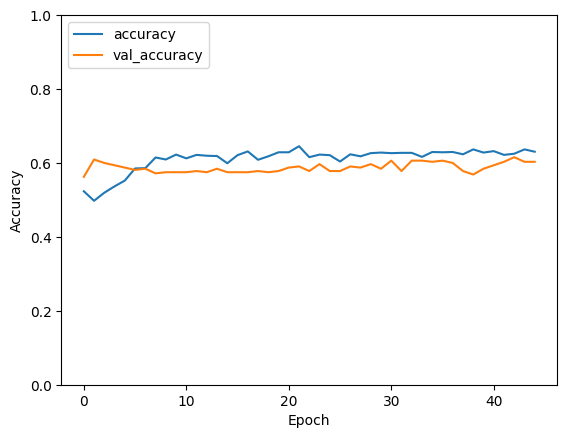

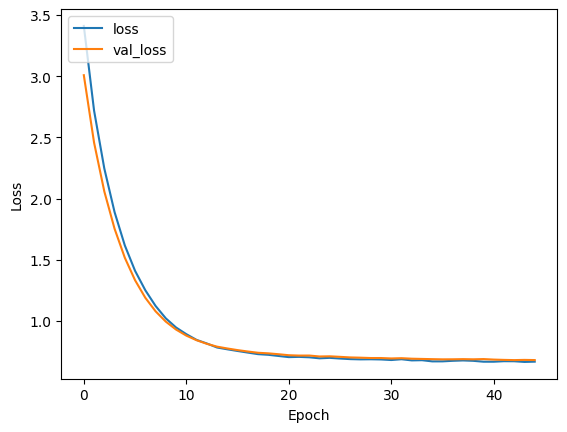

Model model_7 saved successfully.
History for model_7 saved successfully.
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5983 - loss: 0.6945
Test Loss: 0.6875, Test Accuracy: 0.6000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
              precision    recall  f1-score   support

           0       0.67      0.38      0.49       199
           1       0.57      0.82      0.67       201

    accuracy                           0.60       400
   macro avg       0.62      0.60      0.58       400
weighted avg       0.62      0.60      0.58       400

Model 8: conv2DFilter=16, kernelSize=(3, 3), poolSize=(2, 2), dropoutNum=0.5, kernelReg=0.01, batchSize=5, lr=0.0001
Epoch 1/45


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.5272 - loss: 3.7532 - val_accuracy: 0.4594 - val_loss: 3.2596
Epoch 2/45
256/256 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.5006 - loss: 3.1346 - val_accuracy: 0.4625 - val_loss: 2.7736
Epoch 3/45
256/256 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.5386 - loss: 2.6704 - val_accuracy: 0.4563 - val_loss: 2.3908
Epoch 4/45
256/256 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.4957 - loss: 2.3076 - val_accuracy: 0.4563 - val_loss: 2.0798
Epoch 5/45
256/256 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.5380 - loss: 2.0069 - val_accuracy: 0.4563 - val_loss: 1.8242
Epoch 6/45
256/256 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.5258 - loss: 1.7646 - val_accuracy: 0.4563 - val_loss: 1.6122
Epoch 7/45
256/256 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.5095 - loss: 1.5654 - val_accuracy: 0.4563 - val_loss: 1.4365
Epoch 8/45
256/256 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.5022 - loss: 1.3934 - val_accuracy: 0.462

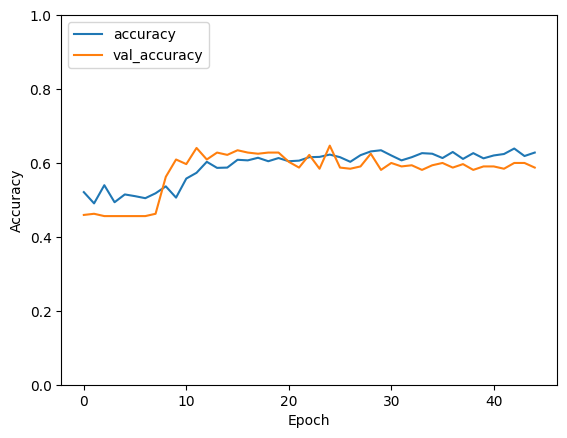

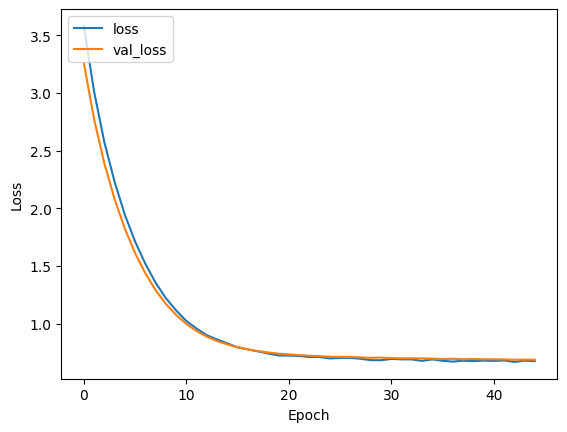

Model model_8 saved successfully.
History for model_8 saved successfully.
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5576 - loss: 0.7010
Test Loss: 0.6950, Test Accuracy: 0.5800
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
              precision    recall  f1-score   support

           0       0.69      0.29      0.40       199
           1       0.55      0.87      0.68       201

    accuracy                           0.58       400
   macro avg       0.62      0.58      0.54       400
weighted avg       0.62      0.58      0.54       400

Model 9: conv2DFilter=16, kernelSize=(3, 3), poolSize=(2, 2), dropoutNum=0.5, kernelReg=0.01, batchSize=7, lr=0.0001


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/45
183/183 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.5111 - loss: 3.8698 - val_accuracy: 0.5656 - val_loss: 3.5232
Epoch 2/45
183/183 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.5090 - loss: 3.4471 - val_accuracy: 0.4938 - val_loss: 3.2121
Epoch 3/45
183/183 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.5186 - loss: 3.1487 - val_accuracy: 0.5594 - val_loss: 2.9465
Epoch 4/45
183/183 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.4824 - loss: 2.9057 - val_accuracy: 0.5781 - val_loss: 2.7154
Epoch 5/45
183/183 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.5215 - loss: 2.6595 - val_accuracy: 0.5594 - val_loss: 2.5104
Epoch 6/45
183/183 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.5257 - loss: 2.4581 - val_accuracy: 0.5562 - val_loss: 2.3263
Epoch 7/45
183/183 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.5329 - loss: 2.2709 - val_accuracy: 0.5437 - val_loss: 2.1598
Epoch 8/45
183/183 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.5466 - loss: 2.1057 - val_accu

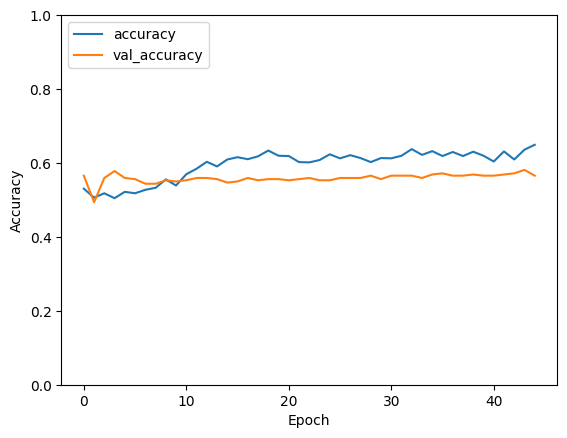

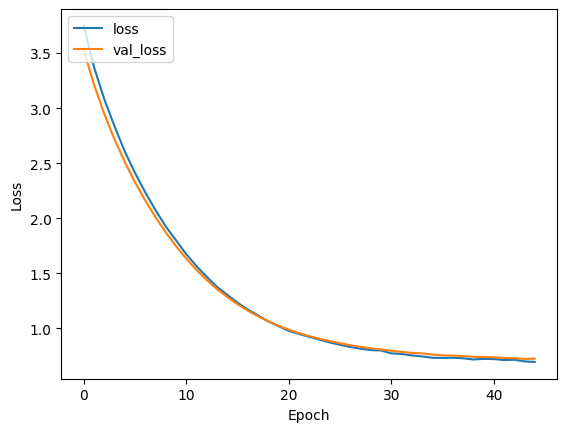

Model model_9 saved successfully.
History for model_9 saved successfully.
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5216 - loss: 0.7423
Test Loss: 0.7375, Test Accuracy: 0.5350
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
              precision    recall  f1-score   support

           0       0.88      0.08      0.14       199
           1       0.52      0.99      0.68       201

    accuracy                           0.54       400
   macro avg       0.70      0.53      0.41       400
weighted avg       0.70      0.54      0.41       400

Model 10: conv2DFilter=16, kernelSize=(3, 3), poolSize=(2, 2), dropoutNum=0.5, kernelReg=0.001, batchSize=3, lr=0.0001
Epoch 1/45


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


427/427 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.4990 - loss: 1.0311 - val_accuracy: 0.5312 - val_loss: 0.9888
Epoch 2/45
427/427 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.4819 - loss: 1.0012 - val_accuracy: 0.5688 - val_loss: 0.9757
Epoch 3/45
427/427 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.5007 - loss: 0.9755 - val_accuracy: 0.5594 - val_loss: 0.9658
Epoch 4/45
427/427 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.4964 - loss: 0.9613 - val_accuracy: 0.5469 - val_loss: 0.9573
Epoch 5/45
427/427 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.5280 - loss: 0.9466 - val_accuracy: 0.5469 - val_loss: 0.9492
Epoch 6/45
427/427 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.5159 - loss: 0.9454 - val_accuracy: 0.5437 - val_loss: 0.9415
Epoch 7/45
427/427 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.5467 - loss: 0.9272 - val_accuracy: 0.5437 - val_loss: 0.9332
Epoch 8/45
427/427 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.5723 - loss: 0.9274 - val_accuracy: 0.543

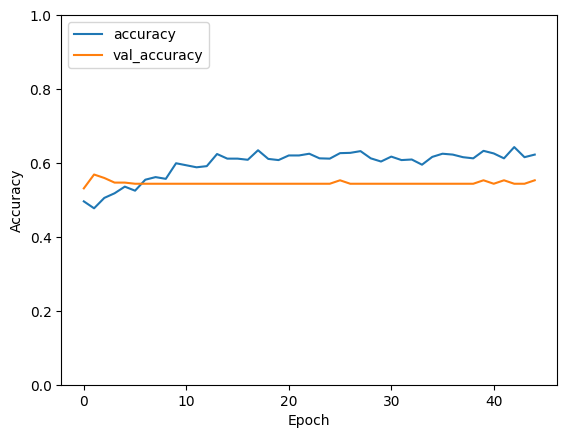

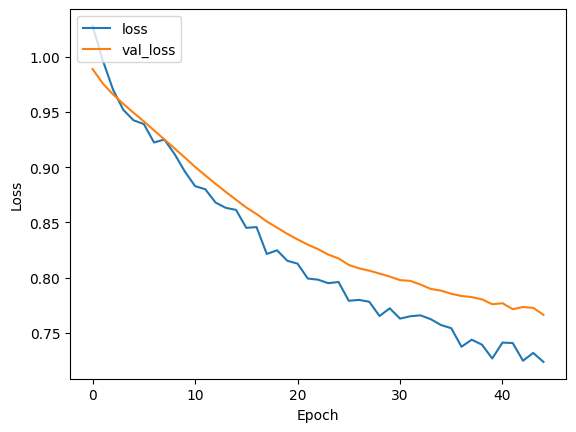

Model model_10 saved successfully.
History for model_10 saved successfully.
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5030 - loss: 0.7888
Test Loss: 0.7841, Test Accuracy: 0.5075
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
              precision    recall  f1-score   support

           0       1.00      0.01      0.02       199
           1       0.51      1.00      0.67       201

    accuracy                           0.51       400
   macro avg       0.75      0.51      0.35       400
weighted avg       0.75      0.51      0.35       400

Model 11: conv2DFilter=16, kernelSize=(3, 3), poolSize=(2, 2), dropoutNum=0.5, kernelReg=0.001, batchSize=5, lr=0.0001
Epoch 1/45


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.5091 - loss: 1.0187 - val_accuracy: 0.4531 - val_loss: 0.9941
Epoch 2/45
256/256 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.4960 - loss: 0.9886 - val_accuracy: 0.4594 - val_loss: 0.9793
Epoch 3/45
256/256 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.5108 - loss: 0.9736 - val_accuracy: 0.5875 - val_loss: 0.9685
Epoch 4/45
256/256 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.5399 - loss: 0.9597 - val_accuracy: 0.5625 - val_loss: 0.9593
Epoch 5/45
256/256 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.4711 - loss: 0.9574 - val_accuracy: 0.5531 - val_loss: 0.9514
Epoch 6/45
256/256 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.5022 - loss: 0.9441 - val_accuracy: 0.5500 - val_loss: 0.9440
Epoch 7/45
256/256 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.5206 - loss: 0.9313 - val_accuracy: 0.5469 - val_loss: 0.9370
Epoch 8/45
256/256 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.5431 - loss: 0.9263 - val_accuracy: 0.543

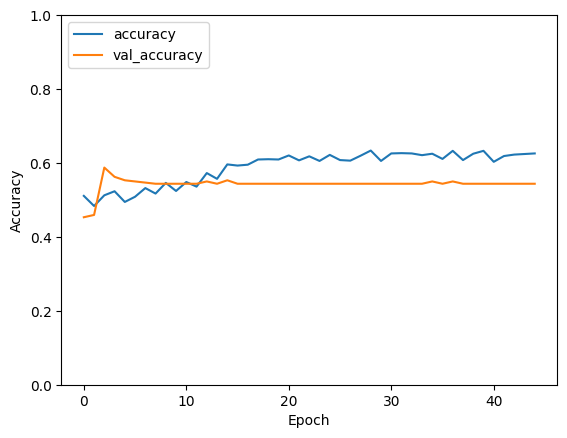

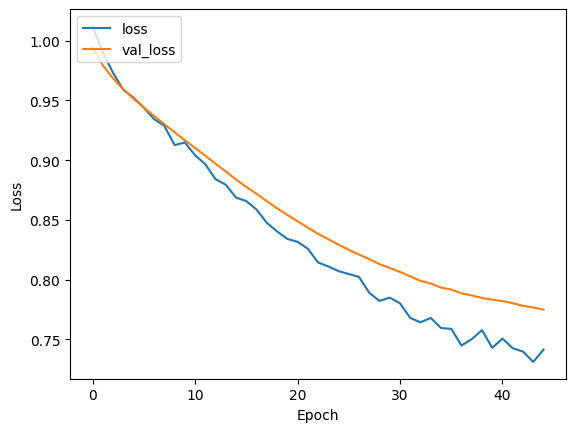

Model model_11 saved successfully.
History for model_11 saved successfully.
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4988 - loss: 0.7946
Test Loss: 0.7920, Test Accuracy: 0.5025
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       199
           1       0.50      1.00      0.67       201

    accuracy                           0.50       400
   macro avg       0.25      0.50      0.33       400
weighted avg       0.25      0.50      0.34       400

Model 12: conv2DFilter=16, kernelSize=(3, 3), poolSize=(2, 2), dropoutNum=0.5, kernelReg=0.001, batchSize=7, lr=0.0001


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolu

Epoch 1/45
183/183 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.5091 - loss: 1.0182 - val_accuracy: 0.4750 - val_loss: 1.0015
Epoch 2/45
183/183 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.5197 - loss: 1.0099 - val_accuracy: 0.5125 - val_loss: 0.9893
Epoch 3/45
183/183 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.4904 - loss: 0.9975 - val_accuracy: 0.5469 - val_loss: 0.9796
Epoch 4/45
183/183 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.5092 - loss: 0.9772 - val_accuracy: 0.5562 - val_loss: 0.9715
Epoch 5/45
183/183 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.4861 - loss: 0.9752 - val_accuracy: 0.5531 - val_loss: 0.9646
Epoch 6/45
183/183 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.5012 - loss: 0.9614 - val_accuracy: 0.5531 - val_loss: 0.9581
Epoch 7/45
183/183 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.5227 - loss: 0.9539 - val_accuracy: 0.5625 - val_loss: 0.9521
Epoch 8/45
183/183 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.5126 - loss: 0.9473 - val_accu

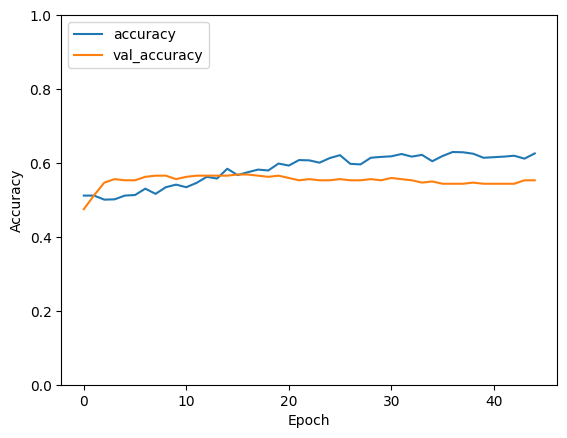

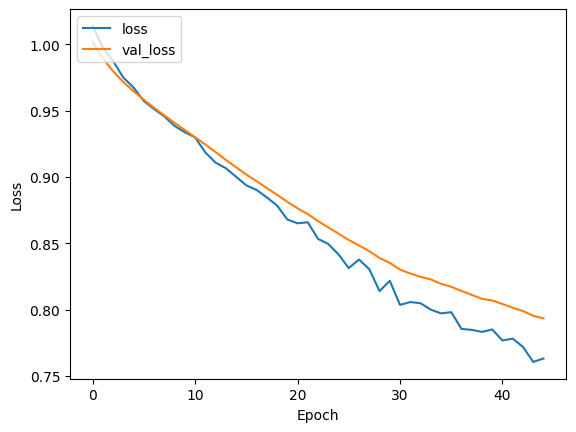

Model model_12 saved successfully.
History for model_12 saved successfully.
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5015 - loss: 0.8111
Test Loss: 0.8076, Test Accuracy: 0.5050
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 436ms/step
              precision    recall  f1-score   support

           0       1.00      0.01      0.01       199
           1       0.50      1.00      0.67       201

    accuracy                           0.51       400
   macro avg       0.75      0.50      0.34       400
weighted avg       0.75      0.51      0.34       400

Model 13: conv2DFilter=32, kernelSize=(3, 3), poolSize=(2, 2), dropoutNum=0.25, kernelReg=0.01, batchSize=3, lr=0.0001


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/45
427/427 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.4806 - loss: 3.4477 - val_accuracy: 0.4531 - val_loss: 2.2057
Epoch 2/45
427/427 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.5255 - loss: 1.9581 - val_accuracy: 0.5594 - val_loss: 1.4521
Epoch 3/45
427/427 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.6027 - loss: 1.3365 - val_accuracy: 0.5688 - val_loss: 1.1236
Epoch 4/45
427/427 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.5828 - loss: 1.0583 - val_accuracy: 0.6062 - val_loss: 0.9385
Epoch 5/45
427/427 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.6458 - loss: 0.8912 - val_accuracy: 0.6094 - val_loss: 0.8471
Epoch 6/45
427/427 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.5959 - loss: 0.8270 - val_accuracy: 0.6219 - val_loss: 0.8002
Epoch 7/45
427/427 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.6072 - loss: 0.7795 - val_accuracy: 0.6187 - val_loss: 0.7668
Epoch 8/45
427/427 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.6429 - loss: 0.7530 - val_acc

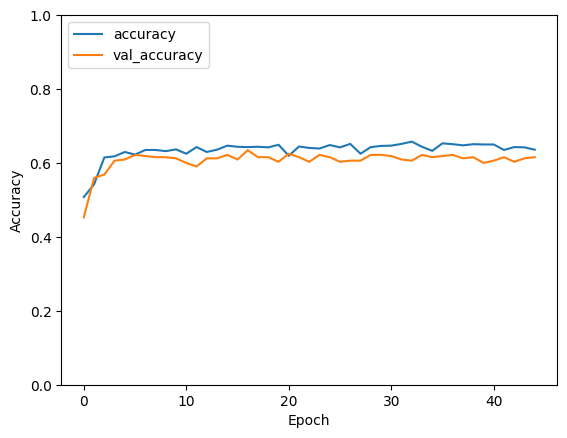

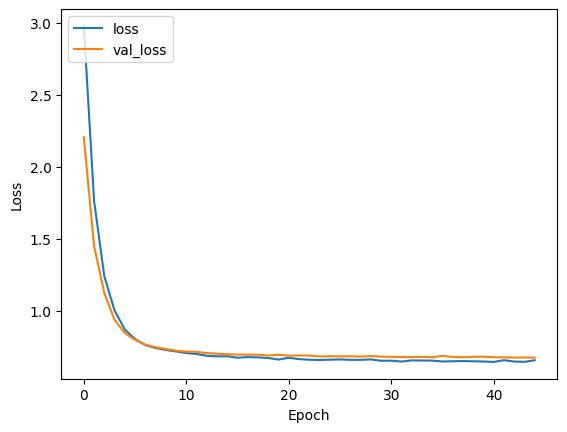

Model model_13 saved successfully.
History for model_13 saved successfully.
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5949 - loss: 0.6836
Test Loss: 0.6770, Test Accuracy: 0.5950
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step
              precision    recall  f1-score   support

           0       0.61      0.52      0.56       199
           1       0.58      0.67      0.62       201

    accuracy                           0.59       400
   macro avg       0.60      0.59      0.59       400
weighted avg       0.60      0.59      0.59       400

Model 14: conv2DFilter=32, kernelSize=(3, 3), poolSize=(2, 2), dropoutNum=0.25, kernelReg=0.01, batchSize=5, lr=0.0001


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/45
256/256 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.5075 - loss: 3.6376 - val_accuracy: 0.4563 - val_loss: 2.7335
Epoch 2/45
256/256 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.5316 - loss: 2.5141 - val_accuracy: 0.4594 - val_loss: 1.9826
Epoch 3/45
256/256 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.5452 - loss: 1.8416 - val_accuracy: 0.5656 - val_loss: 1.5337
Epoch 4/45
256/256 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.6064 - loss: 1.4514 - val_accuracy: 0.6156 - val_loss: 1.2611
Epoch 5/45
256/256 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.6337 - loss: 1.2069 - val_accuracy: 0.5938 - val_loss: 1.1012
Epoch 6/45
256/256 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.6216 - loss: 1.0550 - val_accuracy: 0.6062 - val_loss: 0.9948
Epoch 7/45
256/256 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.6038 - loss: 0.9727 - val_accuracy: 0.6125 - val_loss: 0.9157
Epoch 8/45
256/256 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.6494 - loss: 0.8753 - val_accu

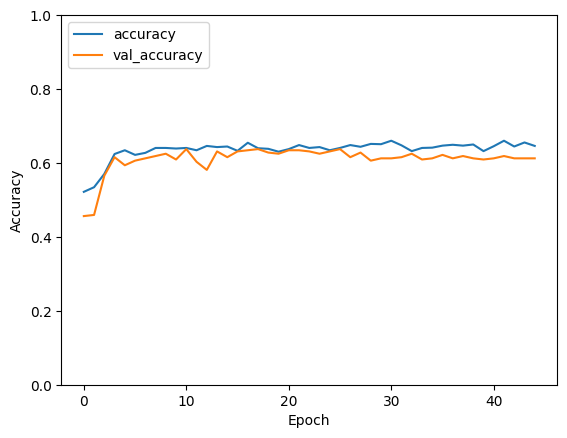

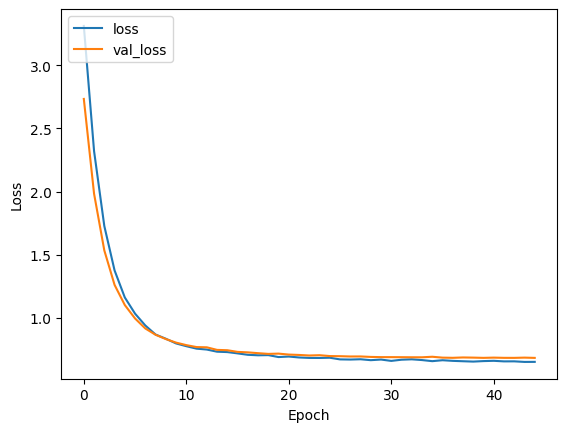

Model model_14 saved successfully.
History for model_14 saved successfully.
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.6134 - loss: 0.6915
Test Loss: 0.6850, Test Accuracy: 0.6150
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step
              precision    recall  f1-score   support

           0       0.66      0.46      0.54       199
           1       0.59      0.77      0.67       201

    accuracy                           0.61       400
   macro avg       0.63      0.61      0.60       400
weighted avg       0.63      0.61      0.61       400

Model 15: conv2DFilter=32, kernelSize=(3, 3), poolSize=(2, 2), dropoutNum=0.25, kernelReg=0.01, batchSize=7, lr=0.0001


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/45
183/183 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.5089 - loss: 3.7480 - val_accuracy: 0.4563 - val_loss: 3.0308
Epoch 2/45
183/183 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.5203 - loss: 2.8380 - val_accuracy: 0.4688 - val_loss: 2.3572
Epoch 3/45
183/183 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.5447 - loss: 2.2163 - val_accuracy: 0.5562 - val_loss: 1.8996
Epoch 4/45
183/183 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.5937 - loss: 1.8012 - val_accuracy: 0.5656 - val_loss: 1.5879
Epoch 5/45
183/183 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.6226 - loss: 1.5020 - val_accuracy: 0.6031 - val_loss: 1.3650
Epoch 6/45
183/183 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.6339 - loss: 1.3053 - val_accuracy: 0.6313 - val_loss: 1.2049
Epoch 7/45
183/183 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.6361 - loss: 1.1566 - val_accuracy: 0.6094 - val_loss: 1.0906
Epoch 8/45
183/183 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.6249 - loss: 1.0445 - val_accu

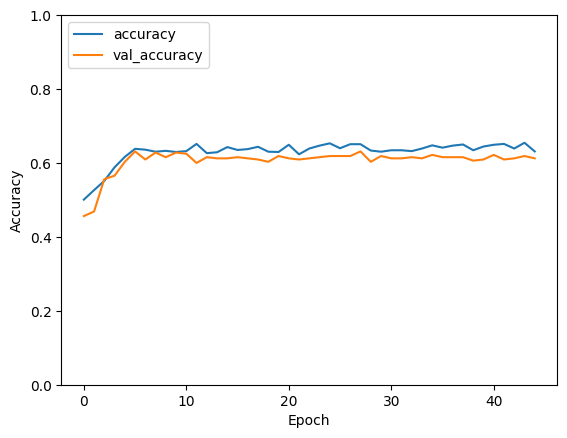

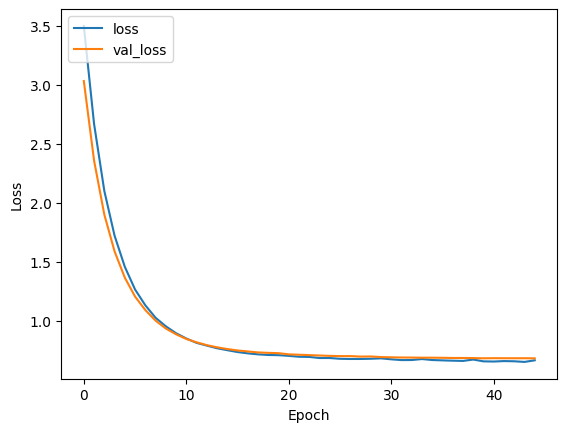

Model model_15 saved successfully.
History for model_15 saved successfully.
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6097 - loss: 0.6882
Test Loss: 0.6835, Test Accuracy: 0.6125
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step
              precision    recall  f1-score   support

           0       0.65      0.47      0.55       199
           1       0.59      0.76      0.66       201

    accuracy                           0.61       400
   macro avg       0.62      0.61      0.60       400
weighted avg       0.62      0.61      0.60       400

Model 16: conv2DFilter=32, kernelSize=(3, 3), poolSize=(2, 2), dropoutNum=0.25, kernelReg=0.001, batchSize=3, lr=0.0001
Epoch 1/45


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


427/427 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.5006 - loss: 0.9862 - val_accuracy: 0.4750 - val_loss: 0.9246
Epoch 2/45
427/427 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.5322 - loss: 0.8949 - val_accuracy: 0.5656 - val_loss: 0.8753
Epoch 3/45
427/427 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.5981 - loss: 0.8556 - val_accuracy: 0.5719 - val_loss: 0.8441
Epoch 4/45
427/427 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.6273 - loss: 0.8247 - val_accuracy: 0.5688 - val_loss: 0.8244
Epoch 5/45
427/427 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.6136 - loss: 0.8035 - val_accuracy: 0.6250 - val_loss: 0.8035
Epoch 6/45
427/427 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.6387 - loss: 0.7805 - val_accuracy: 0.6062 - val_loss: 0.7902
Epoch 7/45
427/427 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.6418 - loss: 0.7595 - val_accuracy: 0.6219 - val_loss: 0.7766
Epoch 8/45
427/427 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.6578 - loss: 0.7396 - val_accuracy: 0.61

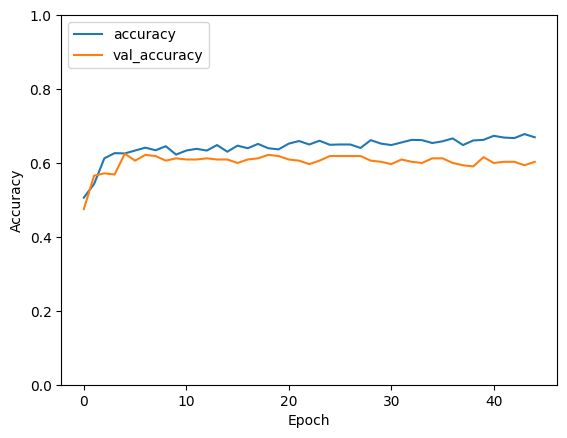

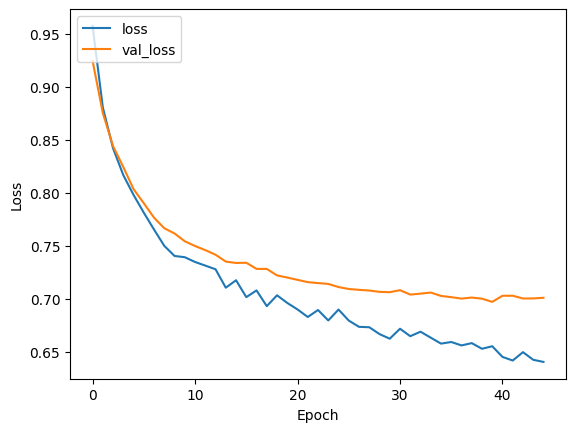

Model model_16 saved successfully.
History for model_16 saved successfully.
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5995 - loss: 0.7140
Test Loss: 0.7010, Test Accuracy: 0.6025
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
              precision    recall  f1-score   support

           0       0.66      0.42      0.51       199
           1       0.58      0.79      0.67       201

    accuracy                           0.60       400
   macro avg       0.62      0.60      0.59       400
weighted avg       0.62      0.60      0.59       400

Model 17: conv2DFilter=32, kernelSize=(3, 3), poolSize=(2, 2), dropoutNum=0.25, kernelReg=0.001, batchSize=5, lr=0.0001
Epoch 1/45


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.5211 - loss: 1.0024 - val_accuracy: 0.4563 - val_loss: 0.9617
Epoch 2/45
256/256 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.5436 - loss: 0.9391 - val_accuracy: 0.5625 - val_loss: 0.9195
Epoch 3/45
256/256 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.5909 - loss: 0.8996 - val_accuracy: 0.6187 - val_loss: 0.8840
Epoch 4/45
256/256 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.6218 - loss: 0.8775 - val_accuracy: 0.6219 - val_loss: 0.8651
Epoch 5/45
256/256 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.6358 - loss: 0.8393 - val_accuracy: 0.6250 - val_loss: 0.8485
Epoch 6/45
256/256 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.6692 - loss: 0.8159 - val_accuracy: 0.6281 - val_loss: 0.8364
Epoch 7/45
256/256 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.6338 - loss: 0.8301 - val_accuracy: 0.6219 - val_loss: 0.8270
Epoch 8/45
256/256 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.6293 - loss: 0.8118 - val_accuracy: 0.621

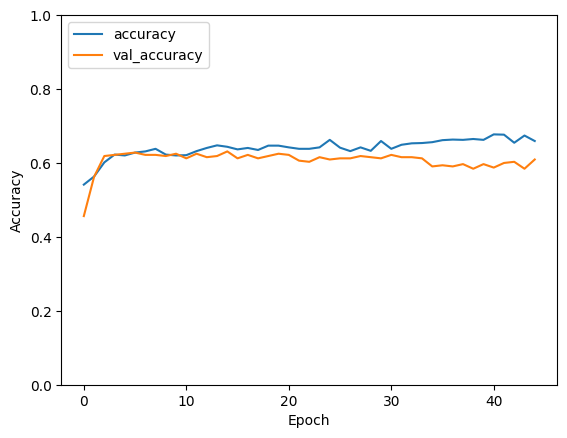

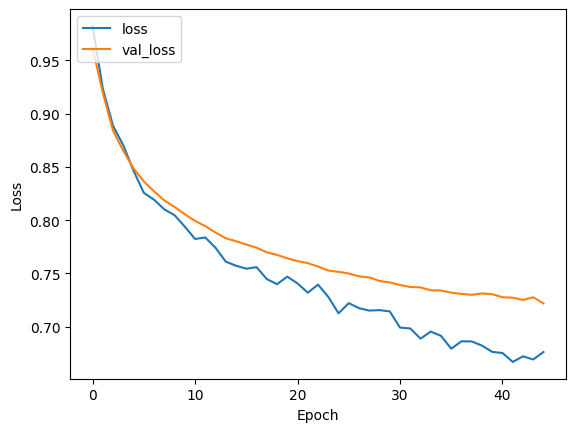

Model model_17 saved successfully.
History for model_17 saved successfully.
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.5775 - loss: 0.7254
Test Loss: 0.7174, Test Accuracy: 0.5875
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
              precision    recall  f1-score   support

           0       0.60      0.51      0.55       199
           1       0.58      0.66      0.62       201

    accuracy                           0.59       400
   macro avg       0.59      0.59      0.59       400
weighted avg       0.59      0.59      0.59       400

Model 18: conv2DFilter=32, kernelSize=(3, 3), poolSize=(2, 2), dropoutNum=0.25, kernelReg=0.001, batchSize=7, lr=0.0001
Epoch 1/45


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


183/183 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.4830 - loss: 1.0181 - val_accuracy: 0.4625 - val_loss: 0.9797
Epoch 2/45
183/183 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.5532 - loss: 0.9617 - val_accuracy: 0.5375 - val_loss: 0.9461
Epoch 3/45
183/183 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.5605 - loss: 0.9239 - val_accuracy: 0.5844 - val_loss: 0.9141
Epoch 4/45
183/183 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.5952 - loss: 0.8947 - val_accuracy: 0.6031 - val_loss: 0.8878
Epoch 5/45
183/183 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.6093 - loss: 0.8805 - val_accuracy: 0.6187 - val_loss: 0.8758
Epoch 6/45
183/183 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.6368 - loss: 0.8574 - val_accuracy: 0.6094 - val_loss: 0.8623
Epoch 7/45
183/183 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.6072 - loss: 0.8723 - val_accuracy: 0.6219 - val_loss: 0.8539
Epoch 8/45
183/183 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.6193 - loss: 0.8402 - val_accuracy: 0.621

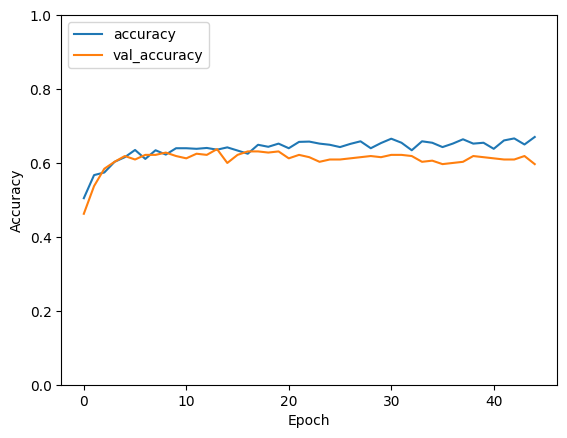

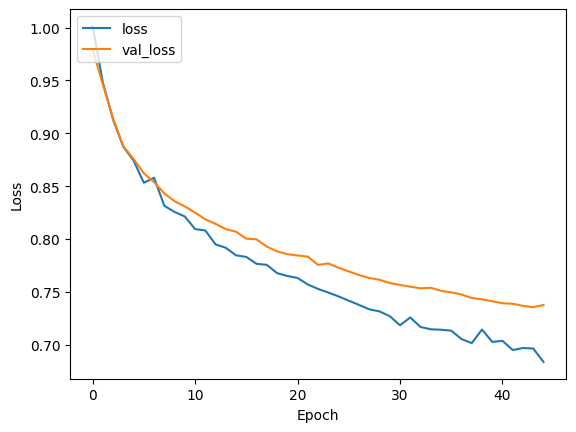

Model model_18 saved successfully.
History for model_18 saved successfully.
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6127 - loss: 0.7502
Test Loss: 0.7427, Test Accuracy: 0.6075
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
              precision    recall  f1-score   support

           0       0.66      0.43      0.52       199
           1       0.58      0.78      0.67       201

    accuracy                           0.61       400
   macro avg       0.62      0.61      0.59       400
weighted avg       0.62      0.61      0.60       400

Model 19: conv2DFilter=32, kernelSize=(3, 3), poolSize=(2, 2), dropoutNum=0.5, kernelReg=0.01, batchSize=3, lr=0.0001
Epoch 1/45


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


427/427 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.4767 - loss: 3.6784 - val_accuracy: 0.5781 - val_loss: 2.9518
Epoch 2/45
427/427 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.5122 - loss: 2.7922 - val_accuracy: 0.5875 - val_loss: 2.3776
Epoch 3/45
427/427 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.5191 - loss: 2.2639 - val_accuracy: 0.5500 - val_loss: 1.9680
Epoch 4/45
427/427 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.5002 - loss: 1.8814 - val_accuracy: 0.6344 - val_loss: 1.6591
Epoch 5/45
427/427 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.5314 - loss: 1.5904 - val_accuracy: 0.6219 - val_loss: 1.4229
Epoch 6/45
427/427 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.5678 - loss: 1.3633 - val_accuracy: 0.6125 - val_loss: 1.2432
Epoch 7/45
427/427 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.5763 - loss: 1.1945 - val_accuracy: 0.6219 - val_loss: 1.1081
Epoch 8/45
427/427 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.6116 - loss: 1.0798 - val_accuracy: 0.58

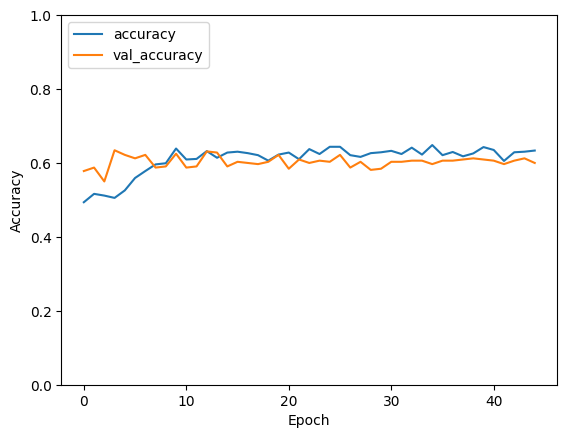

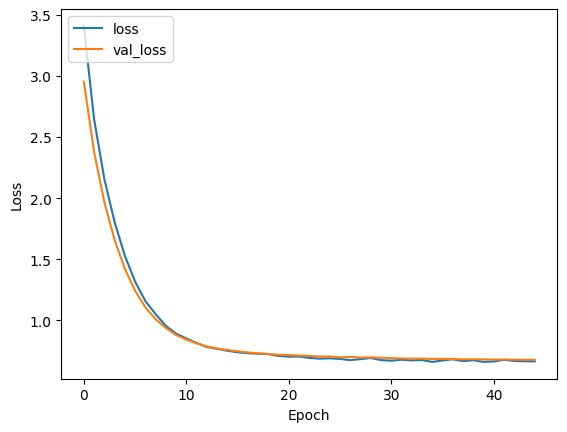

Model model_19 saved successfully.
History for model_19 saved successfully.
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6010 - loss: 0.6902
Test Loss: 0.6846, Test Accuracy: 0.6050
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
              precision    recall  f1-score   support

           0       0.67      0.41      0.51       199
           1       0.58      0.80      0.67       201

    accuracy                           0.60       400
   macro avg       0.62      0.60      0.59       400
weighted avg       0.62      0.60      0.59       400

Model 20: conv2DFilter=32, kernelSize=(3, 3), poolSize=(2, 2), dropoutNum=0.5, kernelReg=0.01, batchSize=5, lr=0.0001
Epoch 1/45


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.5236 - loss: 3.7968 - val_accuracy: 0.4563 - val_loss: 3.2561
Epoch 2/45
256/256 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.4763 - loss: 3.1273 - val_accuracy: 0.4563 - val_loss: 2.7556
Epoch 3/45
256/256 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.5329 - loss: 2.6516 - val_accuracy: 0.4563 - val_loss: 2.3685
Epoch 4/45
256/256 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.5289 - loss: 2.2811 - val_accuracy: 0.5156 - val_loss: 2.0563
Epoch 5/45
256/256 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.5015 - loss: 1.9848 - val_accuracy: 0.5594 - val_loss: 1.8009
Epoch 6/45
256/256 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.5051 - loss: 1.7477 - val_accuracy: 0.5813 - val_loss: 1.5902
Epoch 7/45
256/256 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.5031 - loss: 1.5391 - val_accuracy: 0.6125 - val_loss: 1.4166
Epoch 8/45
256/256 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.5525 - loss: 1.3696 - val_accuracy: 0.621

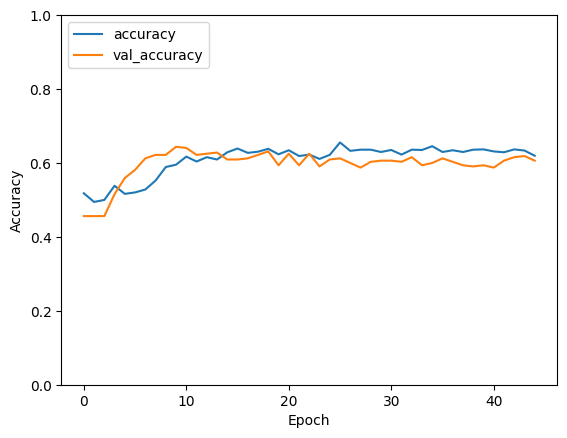

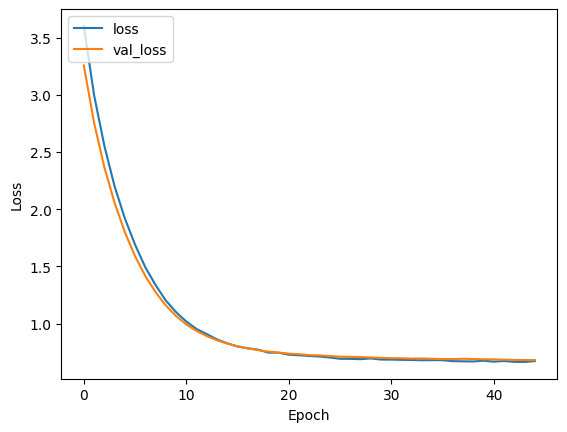

Model model_20 saved successfully.
History for model_20 saved successfully.
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.5969 - loss: 0.6957
Test Loss: 0.6890, Test Accuracy: 0.6000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
              precision    recall  f1-score   support

           0       0.66      0.41      0.50       199
           1       0.57      0.79      0.67       201

    accuracy                           0.60       400
   macro avg       0.62      0.60      0.58       400
weighted avg       0.62      0.60      0.58       400

Model 21: conv2DFilter=32, kernelSize=(3, 3), poolSize=(2, 2), dropoutNum=0.5, kernelReg=0.01, batchSize=7, lr=0.0001
Epoch 1/45


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


183/183 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.4875 - loss: 3.8147 - val_accuracy: 0.4563 - val_loss: 3.3297
Epoch 2/45
183/183 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.5120 - loss: 3.2043 - val_accuracy: 0.4563 - val_loss: 2.8422
Epoch 3/45
183/183 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.5163 - loss: 2.7346 - val_accuracy: 0.4563 - val_loss: 2.4581
Epoch 4/45
183/183 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.5167 - loss: 2.3711 - val_accuracy: 0.4656 - val_loss: 2.1489
Epoch 5/45
183/183 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.5209 - loss: 2.0743 - val_accuracy: 0.5469 - val_loss: 1.8960
Epoch 6/45
183/183 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.5388 - loss: 1.8367 - val_accuracy: 0.5562 - val_loss: 1.6879
Epoch 7/45
183/183 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.5234 - loss: 1.6315 - val_accuracy: 0.5531 - val_loss: 1.5172
Epoch 8/45
183/183 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.5367 - loss: 1.4643 - val_accuracy: 0.568

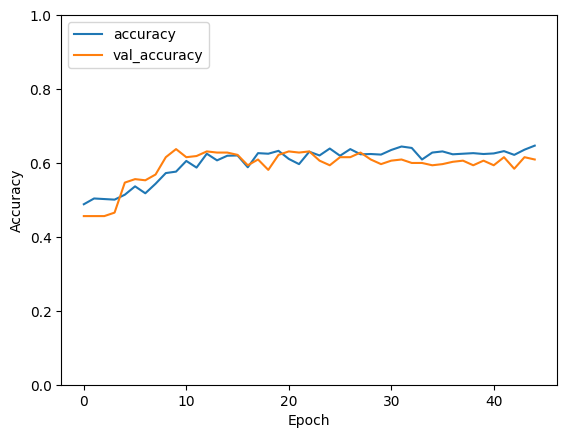

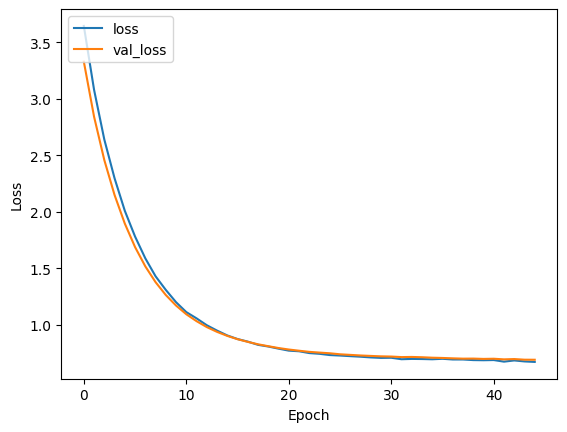

Model model_21 saved successfully.
History for model_21 saved successfully.
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5933 - loss: 0.7021
Test Loss: 0.6955, Test Accuracy: 0.6000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
              precision    recall  f1-score   support

           0       0.67      0.39      0.49       199
           1       0.57      0.81      0.67       201

    accuracy                           0.60       400
   macro avg       0.62      0.60      0.58       400
weighted avg       0.62      0.60      0.58       400

Model 22: conv2DFilter=32, kernelSize=(3, 3), poolSize=(2, 2), dropoutNum=0.5, kernelReg=0.001, batchSize=3, lr=0.0001
Epoch 1/45


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


427/427 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.5139 - loss: 1.0165 - val_accuracy: 0.5781 - val_loss: 0.9871
Epoch 2/45
427/427 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.5114 - loss: 0.9886 - val_accuracy: 0.5562 - val_loss: 0.9713
Epoch 3/45
427/427 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.4992 - loss: 0.9692 - val_accuracy: 0.5625 - val_loss: 0.9583
Epoch 4/45
427/427 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.5336 - loss: 0.9468 - val_accuracy: 0.5594 - val_loss: 0.9457
Epoch 5/45
427/427 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.5437 - loss: 0.9324 - val_accuracy: 0.5688 - val_loss: 0.9333
Epoch 6/45
427/427 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.5494 - loss: 0.9233 - val_accuracy: 0.5688 - val_loss: 0.9220
Epoch 7/45
427/427 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.5705 - loss: 0.9029 - val_accuracy: 0.5688 - val_loss: 0.9114
Epoch 8/45
427/427 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.5939 - loss: 0.8951 - val_accuracy: 0.56

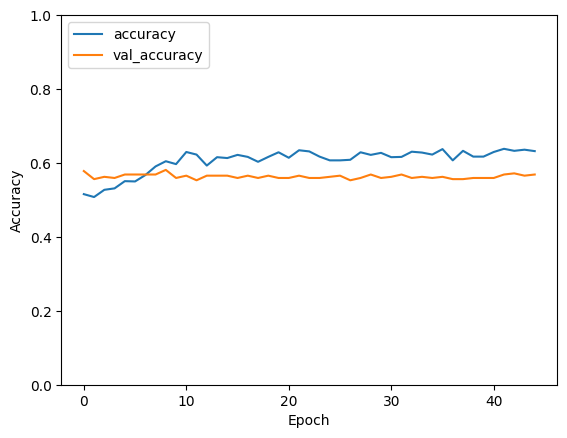

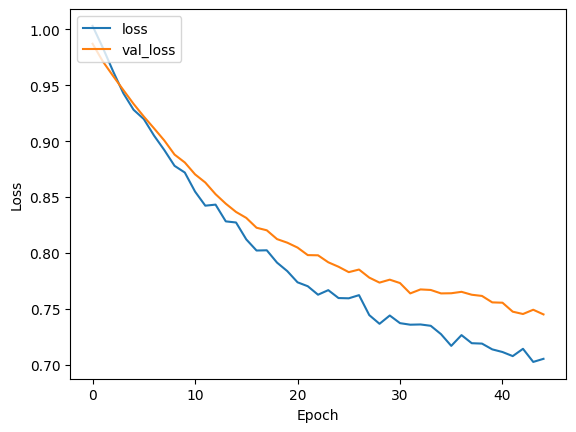

Model model_22 saved successfully.
History for model_22 saved successfully.
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5228 - loss: 0.7690
Test Loss: 0.7619, Test Accuracy: 0.5350
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
              precision    recall  f1-score   support

           0       0.88      0.08      0.14       199
           1       0.52      0.99      0.68       201

    accuracy                           0.54       400
   macro avg       0.70      0.53      0.41       400
weighted avg       0.70      0.54      0.41       400

Model 23: conv2DFilter=32, kernelSize=(3, 3), poolSize=(2, 2), dropoutNum=0.5, kernelReg=0.001, batchSize=5, lr=0.0001
Epoch 1/45


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.5161 - loss: 1.0411 - val_accuracy: 0.4812 - val_loss: 0.9953
Epoch 2/45
256/256 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.4883 - loss: 1.0036 - val_accuracy: 0.4344 - val_loss: 0.9801
Epoch 3/45
256/256 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.5064 - loss: 0.9782 - val_accuracy: 0.4563 - val_loss: 0.9695
Epoch 4/45
256/256 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.4932 - loss: 0.9687 - val_accuracy: 0.4563 - val_loss: 0.9606
Epoch 5/45
256/256 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.5010 - loss: 0.9601 - val_accuracy: 0.4563 - val_loss: 0.9522
Epoch 6/45
256/256 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.5378 - loss: 0.9467 - val_accuracy: 0.4594 - val_loss: 0.9441
Epoch 7/45
256/256 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.5096 - loss: 0.9385 - val_accuracy: 0.4688 - val_loss: 0.9362
Epoch 8/45
256/256 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.5108 - loss: 0.9266 - val_accuracy: 0.59

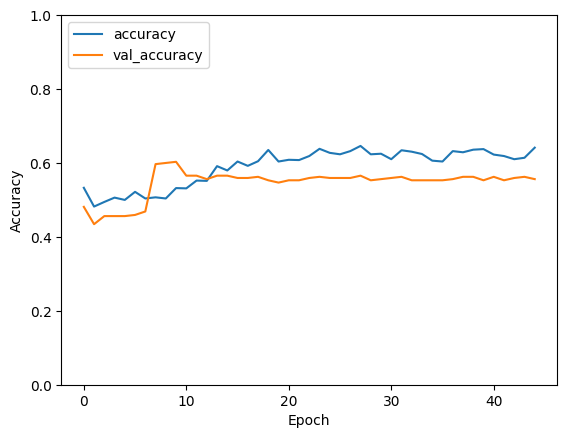

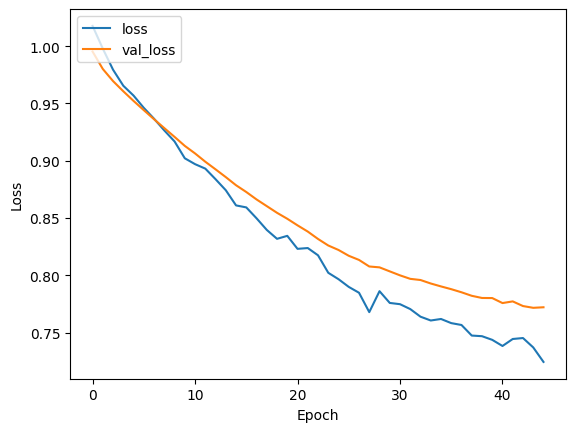

Model model_23 saved successfully.
History for model_23 saved successfully.
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.5003 - loss: 0.7926
Test Loss: 0.7895, Test Accuracy: 0.5050
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
              precision    recall  f1-score   support

           0       1.00      0.01      0.01       199
           1       0.50      1.00      0.67       201

    accuracy                           0.51       400
   macro avg       0.75      0.50      0.34       400
weighted avg       0.75      0.51      0.34       400

Model 24: conv2DFilter=32, kernelSize=(3, 3), poolSize=(2, 2), dropoutNum=0.5, kernelReg=0.001, batchSize=7, lr=0.0001


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/45
183/183 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - accuracy: 0.4989 - loss: 1.0377 - val_accuracy: 0.4563 - val_loss: 1.0046
Epoch 2/45
183/183 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.4772 - loss: 1.0124 - val_accuracy: 0.4563 - val_loss: 0.9913
Epoch 3/45
183/183 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.4910 - loss: 0.9885 - val_accuracy: 0.4563 - val_loss: 0.9809
Epoch 4/45
183/183 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.5012 - loss: 0.9794 - val_accuracy: 0.4563 - val_loss: 0.9720
Epoch 5/45
183/183 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.5205 - loss: 0.9685 - val_accuracy: 0.4563 - val_loss: 0.9641
Epoch 6/45
183/183 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.5191 - loss: 0.9617 - val_accuracy: 0.5906 - val_loss: 0.9565
Epoch 7/45
183/183 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.4793 - loss: 0.9579 - val_accuracy: 0.6281 - val_loss: 0.9495
Epoch 8/45
183/183 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.5035 - loss: 0.9451 - val_accu

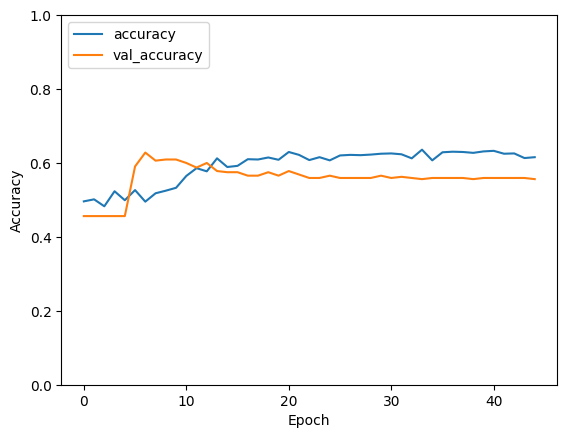

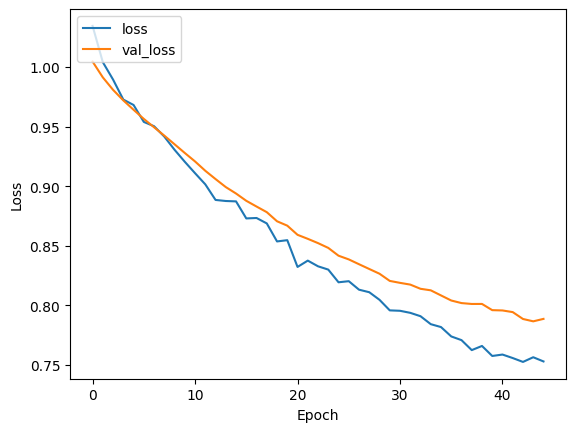

Model model_24 saved successfully.
History for model_24 saved successfully.
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5030 - loss: 0.8099
Test Loss: 0.8055, Test Accuracy: 0.5075
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
              precision    recall  f1-score   support

           0       1.00      0.01      0.02       199
           1       0.51      1.00      0.67       201

    accuracy                           0.51       400
   macro avg       0.75      0.51      0.35       400
weighted avg       0.75      0.51      0.35       400



In [79]:
#Model 15: conv2DFilter=16, kernelSize=(2, 2), poolSize=(2, 2), dropoutNum=0.25, kernelReg=0.01, batchSize=7, lr=0.0001
#Model 26: conv2DFilter=32, kernelSize=(2, 2), poolSize=(2, 2), dropoutNum=0.25, kernelReg=0.001, batchSize=5, lr=0.0001

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.regularizers import L2
#from tensorflow.keras.models import save
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import json

# Define hyperparameter grid
conv2DFilter = [16, 32]
kernelSize = [(3, 3)]
poolSize = [(2, 2)]
dropoutNum = [0.25, 0.5]
kernelReg = [0.01, 0.001]
lr = [0.0001]
batchSize = [3, 5, 7]
epochs=45

# Data placeholders (replace with actual data)
input_data = data_train
labels = labels_train
data_test = data_test
labels_test = labels_test

# Create directories to save models and histories
os.makedirs('models', exist_ok=True)
os.makedirs('histories', exist_ok=True)

# Counter for models
model_counter = 0

# Perform grid search
for aaa in conv2DFilter:
    for bbb in kernelSize:
        for ccc in poolSize:
            for ddd in dropoutNum:
                for eee in kernelReg:
                    for fff in batchSize:
                        for ggg in lr:
                            model_counter += 1
                            model_name = f"model_{model_counter}"
                            print(f"Model {model_counter}: conv2DFilter={aaa}, kernelSize={bbb}, poolSize={ccc}, "
                                  f"dropoutNum={ddd}, kernelReg={eee}, batchSize={fff}, lr={ggg}")
                            try:
                                # Define the model
                                model = 0
                                model = Sequential([
                                    Conv2D(aaa, kernel_size=bbb, activation='relu', input_shape=(23, xy_feature, 1)),
                                    MaxPooling2D(pool_size=ccc),
                                    Dropout(ddd),
                                    Conv2D(aaa, kernel_size=bbb, activation='relu'),
                                    MaxPooling2D(pool_size=ccc),
                                    Dropout(ddd),
                                    Conv2D(aaa, kernel_size=bbb, activation='relu'),
                                    MaxPooling2D(pool_size=ccc),
                                    Dropout(ddd),
                                    Flatten(),
                                    Dense(64, activation='relu', kernel_regularizer=L2(eee)),
                                    Dropout(ddd),
                                    Dense(128, activation='relu', kernel_regularizer=L2(eee)),
                                    Dropout(ddd),
                                    Dense(64, activation='relu', kernel_regularizer=L2(eee)),
                                    Dropout(ddd),
                                    Dense(32, activation='relu', kernel_regularizer=L2(eee)),
                                    Dropout(ddd),
                                    Dense(1, activation='sigmoid')
                                ])

                                # Compile the model
                                optimizer = tf.keras.optimizers.Adam(learning_rate=ggg)
                                model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

                                # Train the model
                                history = 0
                                history = model.fit(
                                    input_data, labels,
                                    epochs=epochs,
                                    batch_size=fff,
                                    validation_split=0.2,
                                    verbose=1
                                )
                                plt.plot(history.history['accuracy'], label='accuracy')
                                plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
                                plt.xlabel('Epoch')
                                plt.ylabel('Accuracy')
                                plt.ylim([0, 1])
                                plt.legend(loc='upper left')
                                plt.show()

                                plt.plot(history.history['loss'], label='loss')
                                plt.plot(history.history['val_loss'], label = 'val_loss')
                                plt.xlabel('Epoch')
                                plt.ylabel('Loss')
                                #plt.ylim([0, 1])
                                plt.legend(loc='upper left')
                                plt.show()

                                # Save the model
                                model.save(f'models/{model_name}.h5')
                                print(f"Model {model_name} saved successfully.")

                                
                                # Save the history
                                with open(f'histories/{model_name}_history.json', 'w') as f:
                                    json.dump(history.history, f)
                                print(f"History for {model_name} saved successfully.")

                                # Evaluate the model
                                loss, accuracy = model.evaluate(data_test, labels_test)
                                print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

                                # Generate predictions
                                prediction = model.predict(data_test)
                                prediction_binary = (prediction > 0.5).astype(int)
                                print(classification_report(labels_test, prediction_binary))

                            except Exception as e:
                                print(f"Error in Model {model_counter}: {e}")


# Rest data for testing

In [40]:
input_data[0]

array([[1., 7., 0., ..., 0., 0., 0.],
       [1., 7., 0., ..., 0., 0., 0.],
       [1., 7., 0., ..., 0., 0., 0.],
       ...,
       [1., 7., 0., ..., 0., 0., 0.],
       [1., 7., 0., ..., 0., 0., 0.],
       [1., 7., 0., ..., 0., 0., 0.]])

In [43]:
input_data[0].shape

(23, 242)

In [58]:
w = w_r_rest

w.x = w.x.astype(int)
print(len(w.x.unique()))
w.y = w.y.astype(int)
print(len(w.y.unique()))

from sklearn.preprocessing import OneHotEncoder
range_values = list(range(0,120))
encoder = OneHotEncoder(categories=[range_values], sparse_output=False)
#Encode 'x' and 'y' columns
x_io = encoder.fit_transform(w.x.values.reshape(-1, 1))
y_io = encoder.fit_transform(w.y.values.reshape(-1, 1))

# Convert to DataFrame for better readability
x_io = pd.DataFrame(x_io, columns=[f'x_{i}' for i in range_values])
y_io = pd.DataFrame(y_io, columns=[f'y_{i}' for i in range_values])

w1 = w[['playDirection', 'yardsToGo']]
w1 = pd.concat([w1, x_io, y_io], axis=1)
data = w1.to_numpy()
print(data.shape)

chan_Id = data.shape[0]/(23)
chan_Id = int(chan_Id)
xy_feature = int(data.shape[1])
print(chan_Id, xy_feature)

reshaped_data = data.reshape(chan_Id, 23, xy_feature)
print(reshaped_data.shape)

Id = list(w.Id.unique())
result = pd.DataFrame()
for i in Id:
    r = w[w['Id']==i].head(1)
    result = pd.concat([result, r], ignore_index=True)

result = result['result']
result = result.to_numpy()



111
47
(29394, 242)
1278 242
(1278, 23, 242)


In [70]:
reshaped_data.shape

(1278, 23, 242)

In [69]:
result.shape

(1278,)

In [82]:
# Evaluate the model
from keras.models import load_model


model = load_model('/kaggle/working/models/model_1.h5')
loss, accuracy = model.evaluate(reshaped_data, result)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

# Generate predictions
prediction = model.predict(reshaped_data)
prediction_binary = (prediction > 0.5).astype(int)
print(classification_report(prediction_binary, result))

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6045 - loss: 0.6341
Test Loss: 0.6384, Test Accuracy: 0.6315
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
              precision    recall  f1-score   support

           0       0.60      0.86      0.71       659
           1       0.73      0.38      0.50       619

    accuracy                           0.63      1278
   macro avg       0.66      0.62      0.60      1278
weighted avg       0.66      0.63      0.61      1278



In [83]:
# Evaluate the model
from keras.models import load_model


model = load_model('/kaggle/working/models/model_2.h5')
loss, accuracy = model.evaluate(reshaped_data, result)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

# Generate predictions
prediction = model.predict(reshaped_data)
prediction_binary = (prediction > 0.5).astype(int)
print(classification_report(prediction_binary, result))

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5854 - loss: 0.6626
Test Loss: 0.6552, Test Accuracy: 0.6221
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
              precision    recall  f1-score   support

           0       0.57      0.88      0.69       619
           1       0.77      0.38      0.51       659

    accuracy                           0.62      1278
   macro avg       0.67      0.63      0.60      1278
weighted avg       0.67      0.62      0.60      1278



In [84]:
# Evaluate the model
from keras.models import load_model


model = load_model('/kaggle/working/models/model_3.h5')
loss, accuracy = model.evaluate(reshaped_data, result)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

# Generate predictions
prediction = model.predict(reshaped_data)
prediction_binary = (prediction > 0.5).astype(int)
print(classification_report(prediction_binary, result))

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.5747 - loss: 0.6656
Test Loss: 0.6584, Test Accuracy: 0.6142
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
              precision    recall  f1-score   support

           0       0.56      0.88      0.68       601
           1       0.78      0.38      0.51       677

    accuracy                           0.61      1278
   macro avg       0.67      0.63      0.60      1278
weighted avg       0.68      0.61      0.59      1278



In [85]:
# Evaluate the model
from keras.models import load_model


model = load_model('/kaggle/working/models/model_4.h5')
loss, accuracy = model.evaluate(reshaped_data, result)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

# Generate predictions
prediction = model.predict(reshaped_data)
prediction_binary = (prediction > 0.5).astype(int)
print(classification_report(prediction_binary, result))

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4288 - loss: 0.7917
Test Loss: 0.7467, Test Accuracy: 0.5243
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
              precision    recall  f1-score   support

           0       0.40      0.91      0.56       424
           1       0.88      0.33      0.48       854

    accuracy                           0.52      1278
   macro avg       0.64      0.62      0.52      1278
weighted avg       0.72      0.52      0.51      1278



In [86]:
# Evaluate the model
from keras.models import load_model


model = load_model('/kaggle/working/models/model_5.h5')
loss, accuracy = model.evaluate(reshaped_data, result)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

# Generate predictions
prediction = model.predict(reshaped_data)
prediction_binary = (prediction > 0.5).astype(int)
print(classification_report(prediction_binary, result))

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.4655 - loss: 0.8151
Test Loss: 0.7657, Test Accuracy: 0.5462
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
              precision    recall  f1-score   support

           0       0.44      0.90      0.59       468
           1       0.85      0.34      0.49       810

    accuracy                           0.55      1278
   macro avg       0.65      0.62      0.54      1278
weighted avg       0.70      0.55      0.53      1278



In [87]:
# Evaluate the model
from keras.models import load_model


model = load_model('/kaggle/working/models/model_6.h5')
loss, accuracy = model.evaluate(reshaped_data, result)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

# Generate predictions
prediction = model.predict(reshaped_data)
prediction_binary = (prediction > 0.5).astype(int)
print(classification_report(prediction_binary, result))

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.4898 - loss: 0.8135
Test Loss: 0.7672, Test Accuracy: 0.5610
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 175ms/step
              precision    recall  f1-score   support

           0       0.47      0.89      0.61       495
           1       0.84      0.35      0.49       783

    accuracy                           0.56      1278
   macro avg       0.65      0.62      0.55      1278
weighted avg       0.70      0.56      0.54      1278



In [88]:
# Evaluate the model
from keras.models import load_model


model = load_model('/kaggle/working/models/model_7.h5')
loss, accuracy = model.evaluate(reshaped_data, result)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

# Generate predictions
prediction = model.predict(reshaped_data)
prediction_binary = (prediction > 0.5).astype(int)
print(classification_report(prediction_binary, result))

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.4696 - loss: 0.7401
Test Loss: 0.7070, Test Accuracy: 0.5485
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
              precision    recall  f1-score   support

           0       0.44      0.90      0.59       463
           1       0.87      0.35      0.49       815

    accuracy                           0.55      1278
   macro avg       0.65      0.63      0.54      1278
weighted avg       0.71      0.55      0.53      1278



In [89]:
# Evaluate the model
from keras.models import load_model


model = load_model('/kaggle/working/models/model_8.h5')
loss, accuracy = model.evaluate(reshaped_data, result)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

# Generate predictions
prediction = model.predict(reshaped_data)
prediction_binary = (prediction > 0.5).astype(int)
print(classification_report(prediction_binary, result))

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.3608 - loss: 0.7481
Test Loss: 0.7167, Test Accuracy: 0.4781
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
              precision    recall  f1-score   support

           0       0.33      0.93      0.48       335
           1       0.92      0.32      0.47       943

    accuracy                           0.48      1278
   macro avg       0.62      0.62      0.48      1278
weighted avg       0.77      0.48      0.48      1278



In [90]:
# Evaluate the model
from keras.models import load_model


model = load_model('/kaggle/working/models/model_9.h5')
loss, accuracy = model.evaluate(reshaped_data, result)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

# Generate predictions
prediction = model.predict(reshaped_data)
prediction_binary = (prediction > 0.5).astype(int)
print(classification_report(prediction_binary, result))

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.1419 - loss: 0.8631
Test Loss: 0.8017, Test Accuracy: 0.3286
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
              precision    recall  f1-score   support

           0       0.10      0.99      0.18        96
           1       1.00      0.27      0.43      1182

    accuracy                           0.33      1278
   macro avg       0.55      0.63      0.31      1278
weighted avg       0.93      0.33      0.41      1278



In [91]:
# Evaluate the model
from keras.models import load_model


model = load_model('/kaggle/working/models/model_10.h5')
loss, accuracy = model.evaluate(reshaped_data, result)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

# Generate predictions
prediction = model.predict(reshaped_data)
prediction_binary = (prediction > 0.5).astype(int)
print(classification_report(prediction_binary, result))

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.0718 - loss: 0.9811
Test Loss: 0.8884, Test Accuracy: 0.2739
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
              precision    recall  f1-score   support

           0       0.03      1.00      0.05        24
           1       1.00      0.26      0.41      1254

    accuracy                           0.27      1278
   macro avg       0.51      0.63      0.23      1278
weighted avg       0.98      0.27      0.41      1278



In [92]:
# Evaluate the model
from keras.models import load_model


model = load_model('/kaggle/working/models/model_11.h5')
loss, accuracy = model.evaluate(reshaped_data, result)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

# Generate predictions
prediction = model.predict(reshaped_data)
prediction_binary = (prediction > 0.5).astype(int)
print(classification_report(prediction_binary, result))

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.0508 - loss: 0.9736
Test Loss: 0.8896, Test Accuracy: 0.2582
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
              precision    recall  f1-score   support

           0       0.00      1.00      0.01         4
           1       1.00      0.26      0.41      1274

    accuracy                           0.26      1278
   macro avg       0.50      0.63      0.21      1278
weighted avg       1.00      0.26      0.41      1278



In [93]:
# Evaluate the model
from keras.models import load_model


model = load_model('/kaggle/working/models/model_12.h5')
loss, accuracy = model.evaluate(reshaped_data, result)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

# Generate predictions
prediction = model.predict(reshaped_data)
prediction_binary = (prediction > 0.5).astype(int)
print(classification_report(prediction_binary, result))

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.0703 - loss: 0.9615
Test Loss: 0.8892, Test Accuracy: 0.2715
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
              precision    recall  f1-score   support

           0       0.02      1.00      0.04        21
           1       1.00      0.26      0.41      1257

    accuracy                           0.27      1278
   macro avg       0.51      0.63      0.23      1278
weighted avg       0.98      0.27      0.41      1278



In [94]:
# Evaluate the model
from keras.models import load_model


model = load_model('/kaggle/working/models/model_13.h5')
loss, accuracy = model.evaluate(reshaped_data, result)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

# Generate predictions
prediction = model.predict(reshaped_data)
prediction_binary = (prediction > 0.5).astype(int)
print(classification_report(prediction_binary, result))

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.5829 - loss: 0.6929
Test Loss: 0.6734, Test Accuracy: 0.6174
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step
              precision    recall  f1-score   support

           0       0.57      0.88      0.69       617
           1       0.76      0.38      0.50       661

    accuracy                           0.62      1278
   macro avg       0.67      0.63      0.60      1278
weighted avg       0.67      0.62      0.59      1278



In [95]:
# Evaluate the model
from keras.models import load_model


model = load_model('/kaggle/working/models/model_14.h5')
loss, accuracy = model.evaluate(reshaped_data, result)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

# Generate predictions
prediction = model.predict(reshaped_data)
prediction_binary = (prediction > 0.5).astype(int)
print(classification_report(prediction_binary, result))

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.5291 - loss: 0.7188
Test Loss: 0.6891, Test Accuracy: 0.5814
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
              precision    recall  f1-score   support

           0       0.50      0.89      0.64       535
           1       0.82      0.36      0.50       743

    accuracy                           0.58      1278
   macro avg       0.66      0.62      0.57      1278
weighted avg       0.69      0.58      0.56      1278



In [96]:
# Evaluate the model
from keras.models import load_model


model = load_model('/kaggle/working/models/model_15.h5')
loss, accuracy = model.evaluate(reshaped_data, result)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

# Generate predictions
prediction = model.predict(reshaped_data)
prediction_binary = (prediction > 0.5).astype(int)
print(classification_report(prediction_binary, result))

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.5550 - loss: 0.6987
Test Loss: 0.6787, Test Accuracy: 0.5978
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
              precision    recall  f1-score   support

           0       0.53      0.88      0.66       570
           1       0.80      0.37      0.50       708

    accuracy                           0.60      1278
   macro avg       0.66      0.63      0.58      1278
weighted avg       0.68      0.60      0.57      1278



In [97]:
# Evaluate the model
from keras.models import load_model


model = load_model('/kaggle/working/models/model_16.h5')
loss, accuracy = model.evaluate(reshaped_data, result)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

# Generate predictions
prediction = model.predict(reshaped_data)
prediction_binary = (prediction > 0.5).astype(int)
print(classification_report(prediction_binary, result))

40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.4620 - loss: 0.8021
Test Loss: 0.7482, Test Accuracy: 0.5336
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step
              precision    recall  f1-score   support

           0       0.44      0.88      0.58       474
           1       0.82      0.33      0.47       804

    accuracy                           0.53      1278
   macro avg       0.63      0.60      0.53      1278
weighted avg       0.68      0.53      0.51      1278



In [98]:
# Evaluate the model
from keras.models import load_model


model = load_model('/kaggle/working/models/model_17.h5')
loss, accuracy = model.evaluate(reshaped_data, result)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

# Generate predictions
prediction = model.predict(reshaped_data)
prediction_binary = (prediction > 0.5).astype(int)
print(classification_report(prediction_binary, result))

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.5725 - loss: 0.7274
Test Loss: 0.7115, Test Accuracy: 0.6002
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
              precision    recall  f1-score   support

           0       0.56      0.85      0.68       623
           1       0.72      0.36      0.48       655

    accuracy                           0.60      1278
   macro avg       0.64      0.61      0.58      1278
weighted avg       0.64      0.60      0.57      1278



In [99]:
# Evaluate the model
from keras.models import load_model


model = load_model('/kaggle/working/models/model_18.h5')
loss, accuracy = model.evaluate(reshaped_data, result)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

# Generate predictions
prediction = model.predict(reshaped_data)
prediction_binary = (prediction > 0.5).astype(int)
print(classification_report(prediction_binary, result))

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.4838 - loss: 0.8312
Test Loss: 0.7783, Test Accuracy: 0.5524
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
              precision    recall  f1-score   support

           0       0.46      0.89      0.60       490
           1       0.83      0.34      0.49       788

    accuracy                           0.55      1278
   macro avg       0.64      0.62      0.54      1278
weighted avg       0.69      0.55      0.53      1278



In [100]:
# Evaluate the model
from keras.models import load_model


model = load_model('/kaggle/working/models/model_19.h5')
loss, accuracy = model.evaluate(reshaped_data, result)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

# Generate predictions
prediction = model.predict(reshaped_data)
prediction_binary = (prediction > 0.5).astype(int)
print(classification_report(prediction_binary, result))

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.4985 - loss: 0.7126
Test Loss: 0.6903, Test Accuracy: 0.5649
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
              precision    recall  f1-score   support

           0       0.47      0.90      0.62       496
           1       0.85      0.35      0.50       782

    accuracy                           0.56      1278
   macro avg       0.66      0.63      0.56      1278
weighted avg       0.70      0.56      0.54      1278



In [101]:
# Evaluate the model
from keras.models import load_model


model = load_model('/kaggle/working/models/model_20.h5')
loss, accuracy = model.evaluate(reshaped_data, result)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

# Generate predictions
prediction = model.predict(reshaped_data)
prediction_binary = (prediction > 0.5).astype(int)
print(classification_report(prediction_binary, result))

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.4989 - loss: 0.7161
Test Loss: 0.6934, Test Accuracy: 0.5673
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
              precision    recall  f1-score   support

           0       0.47      0.90      0.62       501
           1       0.84      0.35      0.50       777

    accuracy                           0.57      1278
   macro avg       0.66      0.63      0.56      1278
weighted avg       0.70      0.57      0.55      1278



In [102]:
# Evaluate the model
from keras.models import load_model


model = load_model('/kaggle/working/models/model_21.h5')
loss, accuracy = model.evaluate(reshaped_data, result)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

# Generate predictions
prediction = model.predict(reshaped_data)
prediction_binary = (prediction > 0.5).astype(int)
print(classification_report(prediction_binary, result))

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.4907 - loss: 0.7142
Test Loss: 0.6962, Test Accuracy: 0.5634
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step
              precision    recall  f1-score   support

           0       0.46      0.91      0.61       484
           1       0.86      0.35      0.50       794

    accuracy                           0.56      1278
   macro avg       0.66      0.63      0.56      1278
weighted avg       0.71      0.56      0.54      1278



In [103]:
# Evaluate the model
from keras.models import load_model


model = load_model('/kaggle/working/models/model_22.h5')
loss, accuracy = model.evaluate(reshaped_data, result)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

# Generate predictions
prediction = model.predict(reshaped_data)
prediction_binary = (prediction > 0.5).astype(int)
print(classification_report(prediction_binary, result))

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.1433 - loss: 0.9524
Test Loss: 0.8601, Test Accuracy: 0.3302
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
              precision    recall  f1-score   support

           0       0.10      0.99      0.18        98
           1       1.00      0.28      0.43      1180

    accuracy                           0.33      1278
   macro avg       0.55      0.63      0.31      1278
weighted avg       0.93      0.33      0.41      1278



In [104]:
# Evaluate the model
from keras.models import load_model


model = load_model('/kaggle/working/models/model_23.h5')
loss, accuracy = model.evaluate(reshaped_data, result)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

# Generate predictions
prediction = model.predict(reshaped_data)
prediction_binary = (prediction > 0.5).astype(int)
print(classification_report(prediction_binary, result))

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.0624 - loss: 0.9711
Test Loss: 0.8865, Test Accuracy: 0.2660
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step
              precision    recall  f1-score   support

           0       0.01      1.00      0.03        14
           1       1.00      0.26      0.41      1264

    accuracy                           0.27      1278
   macro avg       0.51      0.63      0.22      1278
weighted avg       0.99      0.27      0.41      1278



In [105]:
# Evaluate the model
from keras.models import load_model


model = load_model('/kaggle/working/models/model_24.h5')
loss, accuracy = model.evaluate(reshaped_data, result)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

# Generate predictions
prediction = model.predict(reshaped_data)
prediction_binary = (prediction > 0.5).astype(int)
print(classification_report(prediction_binary, result))

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.0716 - loss: 0.9961
Test Loss: 0.9065, Test Accuracy: 0.2739
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
              precision    recall  f1-score   support

           0       0.03      1.00      0.05        24
           1       1.00      0.26      0.41      1254

    accuracy                           0.27      1278
   macro avg       0.51      0.63      0.23      1278
weighted avg       0.98      0.27      0.41      1278

